In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, Holt, SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [3]:
# Sparkling Wine dataset
# 1. Read and plot the data

In [4]:
dfs=pd.read_csv("Sparkling.csv", parse_dates=True, index_col="YearMonth")

In [5]:
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [6]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [7]:
from pylab import rcParams

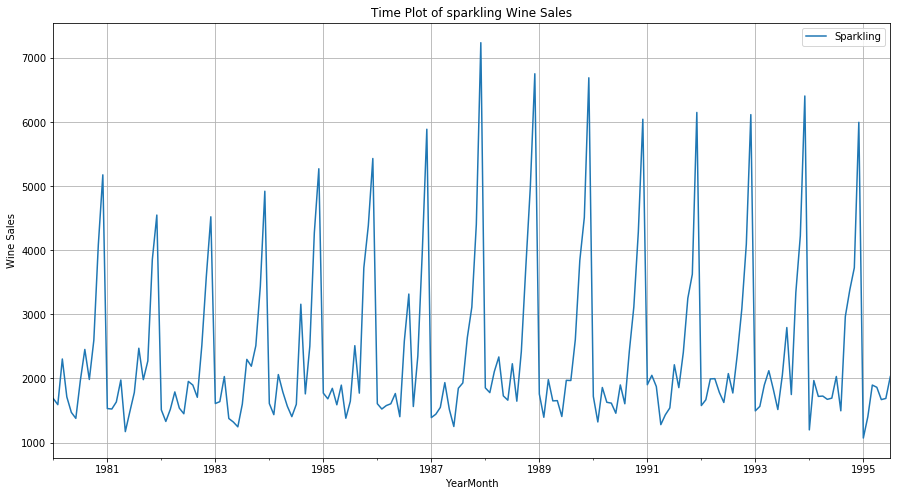

In [8]:
rcParams['figure.figsize']=15,8
dfs.plot()
plt.title("Time Plot of sparkling Wine Sales")
plt.ylabel("Wine Sales")
plt.grid();

In [9]:
# 2 Exploratory data analysis

In [10]:
dfs.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

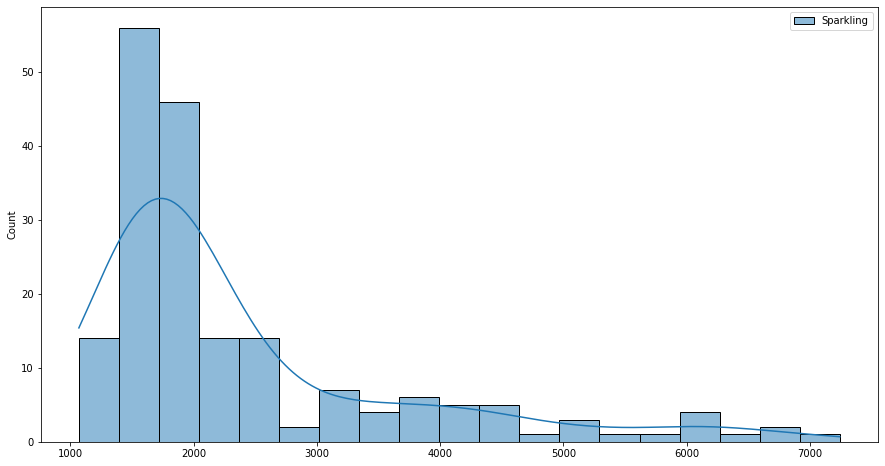

In [11]:
sns.histplot(dfs, kde=True)

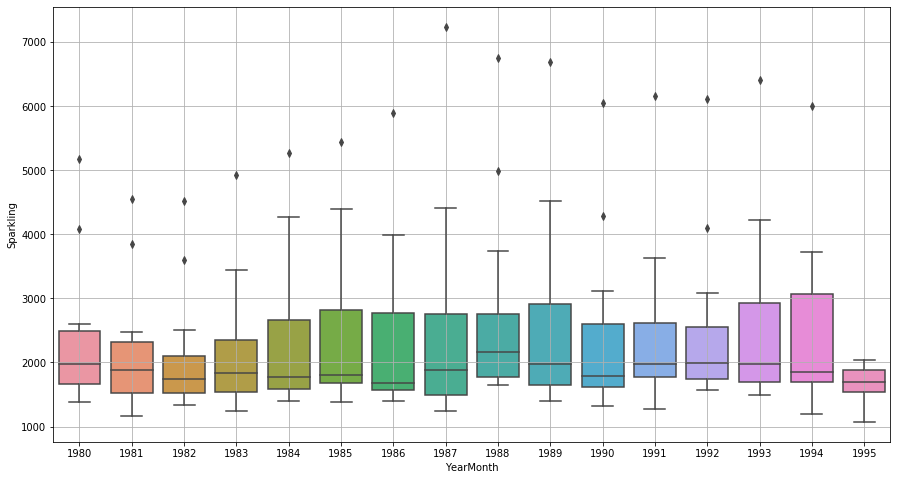

In [12]:
# Yearly Plot
sns.boxplot(x=dfs.index.year, y=dfs.Sparkling,)
plt.grid();

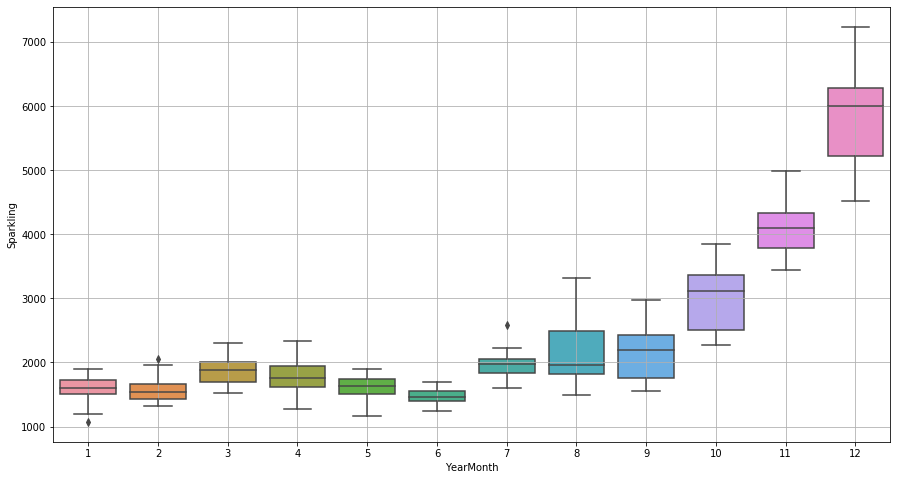

In [13]:
# Monthly Plot
sns.boxplot(x=dfs.index.month, y=dfs.Sparkling)
plt.grid()

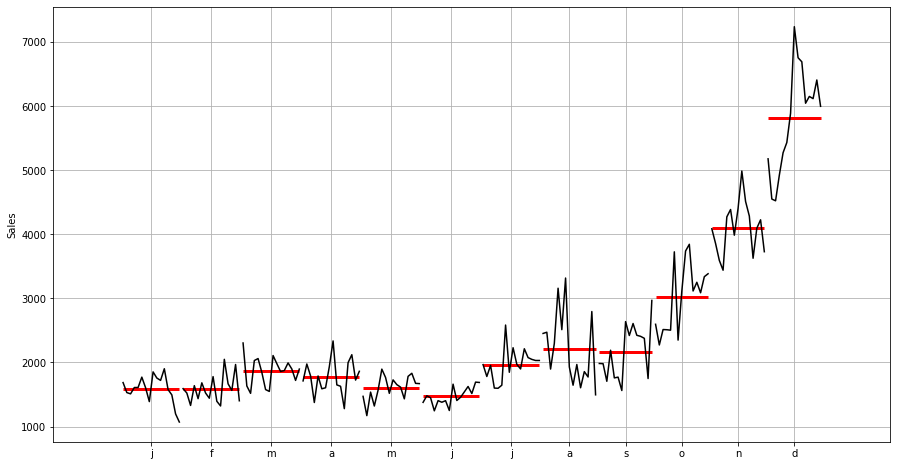

In [14]:
# Month Plot
from statsmodels.graphics.tsaplots import month_plot

month_plot(dfs.Sparkling, ylabel='Sales')
plt.grid();

In [15]:
# Monthly wine sales across years

In [16]:
monthly_sales_across_years = pd.pivot_table(dfs, values = 'Sparkling', columns = dfs.index.month, index = dfs.index.year)
monthly_sales_across_years.style.highlight_max()

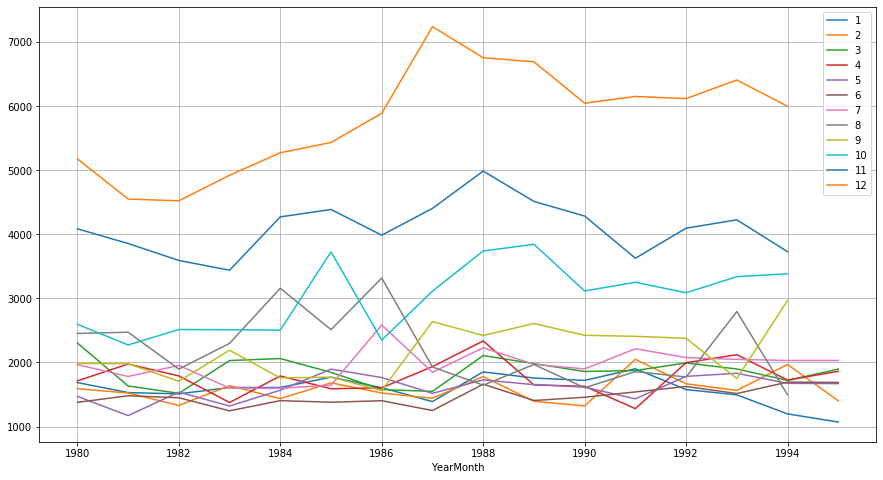

In [17]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

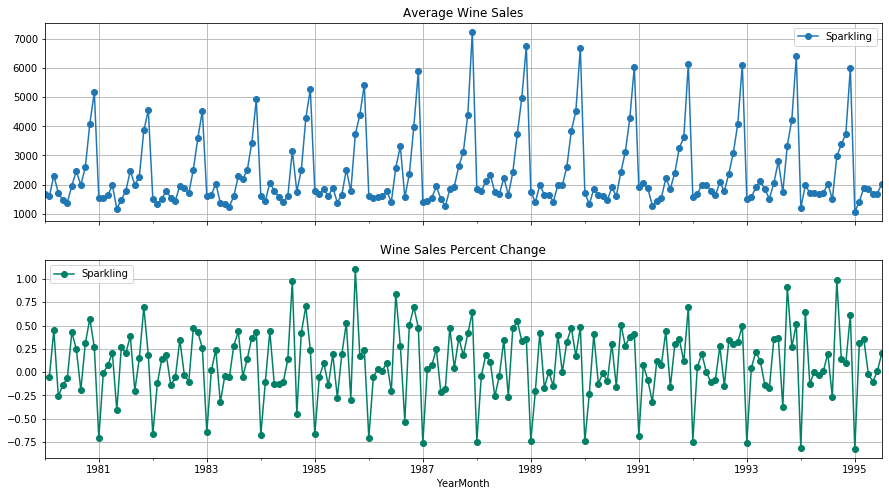

In [18]:
# average RetailSales, and precent change
average    = dfs.groupby(dfs.index)["Sparkling"].mean()
pct_change = dfs.groupby(dfs.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True)

In [19]:
# Decomposition

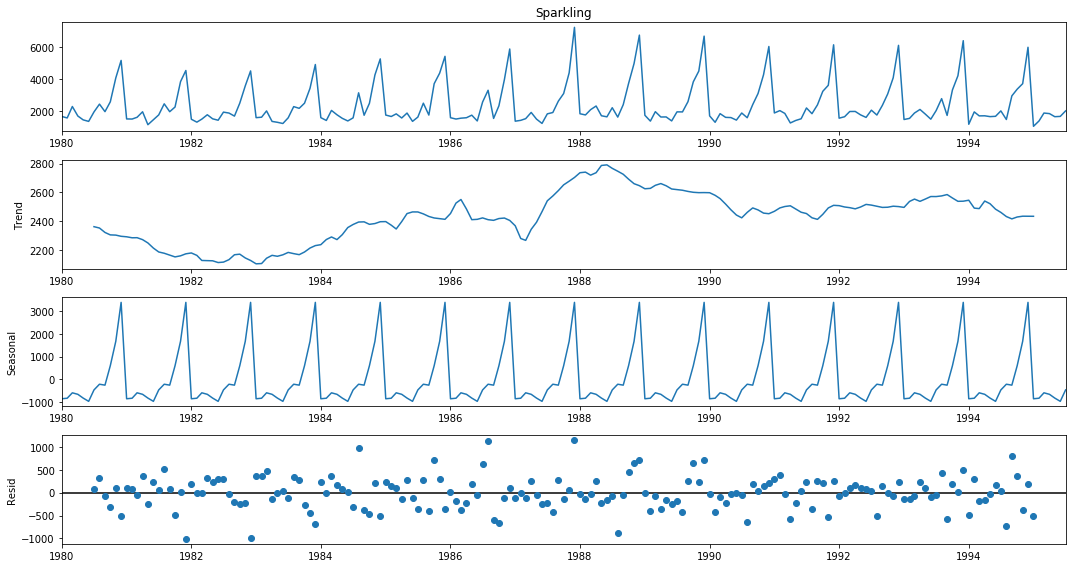

In [20]:
# Additive Decomposition
decomposition= seasonal_decompose(dfs.Sparkling, model='additive')
decomposition.plot();
#plt.xlabel('Year');

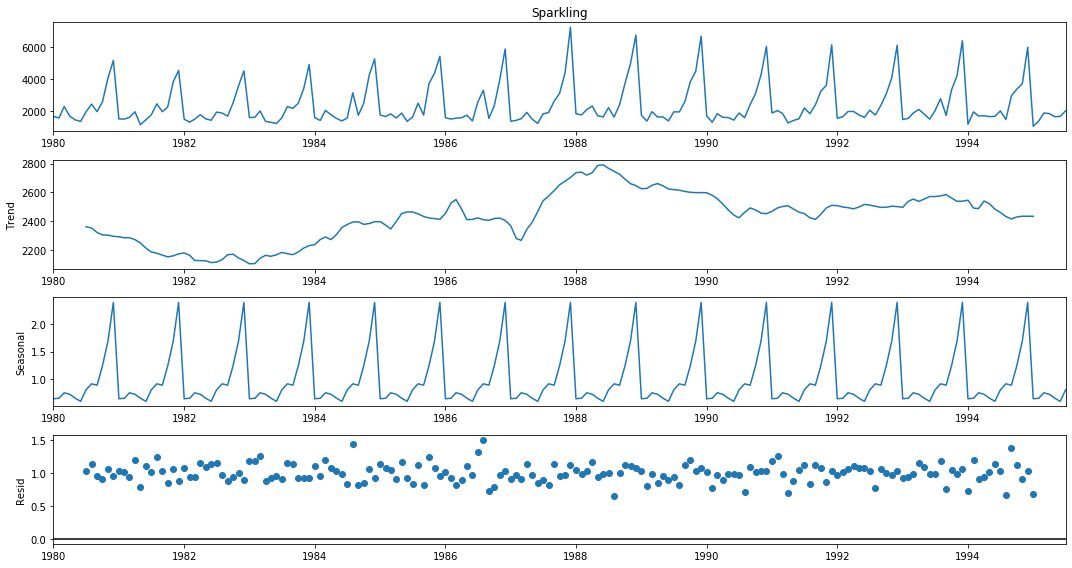

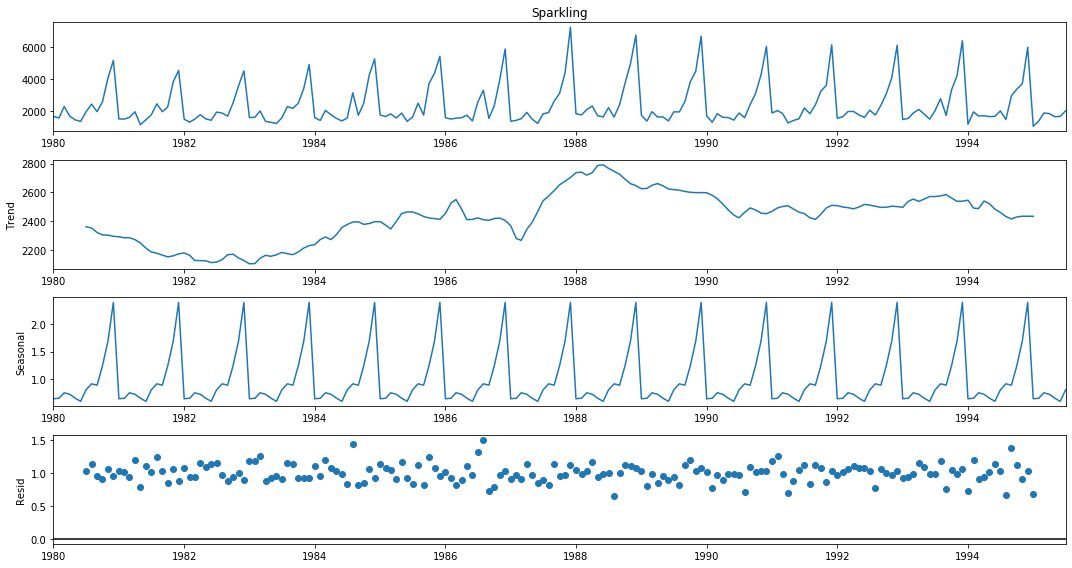

In [21]:
# Multiplicative Decomposition
decomposition= seasonal_decompose(dfs.Sparkling, model='multiplicative')
decomposition.plot()
#plt.xlabel('Year');

In [22]:
# Split the data into train and test

In [23]:
dfs_train = dfs.loc[dfs.index.year < 1991]
dfs_test = dfs.loc[dfs.index.year >= 1991]

In [24]:
from IPython.display import display
print("Shape of the training data is")
display(dfs_train.shape)
print("Shape of the test data is") 
display(dfs_test.shape)

Shape of the training data is


(132, 1)

Shape of the test data is


(55, 1)

In [25]:
print("First few rows of the training data is")
display(dfs_train.head())
print("First Few rows of the test data is") 
display(dfs_test.head())
print("Last few rows of the training data is")
display(dfs_train.tail())
print("Last Few rows of the test data is") 
display(dfs_test.tail())

First few rows of the training data is


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

First Few rows of the test data is


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of the training data is


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

Last Few rows of the test data is


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

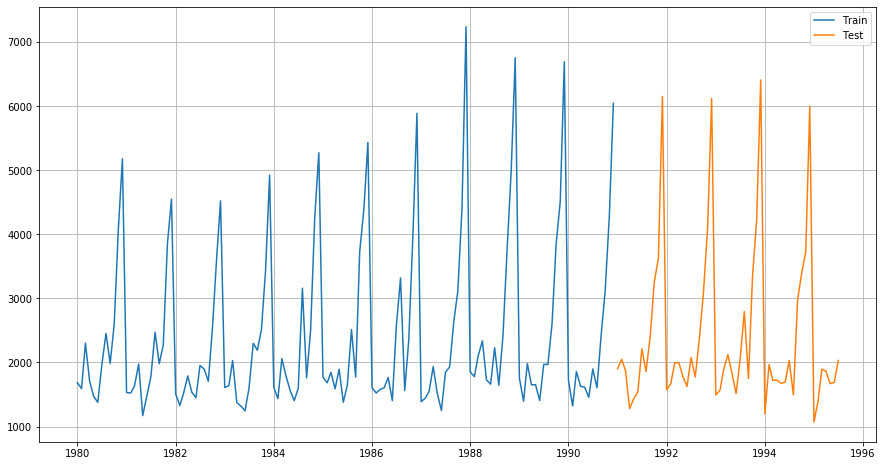

In [26]:
plt.figure(figsize=(15,8))
plt.plot(dfs_train, label="Train")
plt.plot(dfs_test, label="Test")
plt.legend(loc="best")
plt.grid();

In [27]:
# Exponential Smoothing Methods

In [28]:
# Naive Forecast

In [29]:
dfs_naive_train=dfs_train.copy()
dfs_naive_test=dfs_test.copy()

In [30]:
dfs_naive_test['Naive'] = np.asarray(dfs_naive_train.iloc[len(dfs_naive_train) - 1])[0]
dfs_naive_test.head()

Sparkling  Naive
YearMonth                   
1991-01-01       1902   6047
1991-02-01       2049   6047
1991-03-01       1874   6047
1991-04-01       1279   6047
1991-05-01       1432   6047

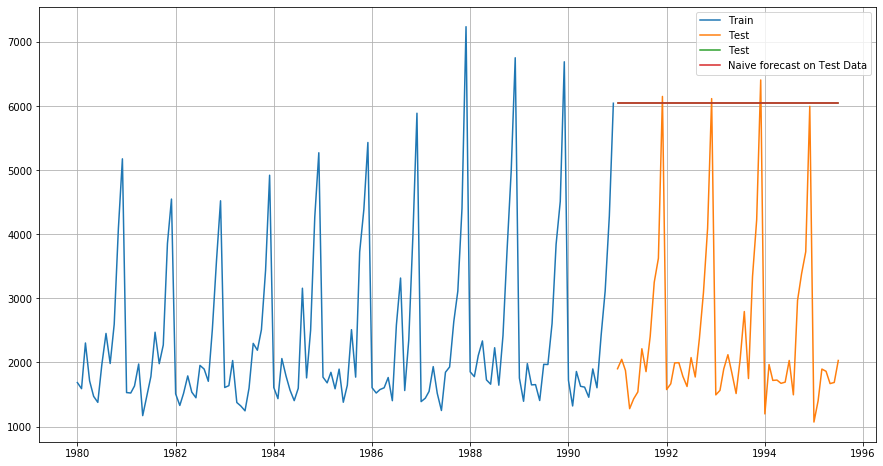

In [31]:
plt.figure(figsize=(15,8))
plt.plot(dfs_naive_train, label="Train")
plt.plot(dfs_naive_test, label="Test")
plt.plot(dfs_naive_test['Naive'], label="Naive forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [32]:
dfs_naive_rmse = mean_squared_error(dfs_naive_test["Sparkling"],dfs_naive_test['Naive'],squared=False)
print("RMSE for Naive forecast model on Sparkling wine data is %3.3f" %dfs_naive_rmse)

RMSE for Naive forecast model on Sparkling wine data is 3864.279


In [33]:
dfs_results = pd.DataFrame({'Test RMSE': [dfs_naive_rmse]},
                                index=['Naive Model'])

In [34]:
dfs_results

Test RMSE
Naive Model  3864.279352

In [35]:
# Linear Regression

In [36]:
dfs_lr_train= dfs_train.copy()
dfs_lr_test= dfs_test.copy()

In [37]:
dfs_lr_train["Time"] = [i + 1 for i in range(len(dfs_lr_train))]
dfs_lr_test["Time"] = [i + 133 for i in range(len(dfs_lr_test))]

In [38]:
print(dfs_lr_train.head())
print(dfs_lr_train.tail())

            Sparkling  Time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5
            Sparkling  Time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132


In [39]:
print(dfs_lr_test.head())
print(dfs_lr_test.tail())

            Sparkling  Time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137
            Sparkling  Time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187


In [40]:
dfs_lr = LinearRegression()
dfs_lr.fit(dfs_lr_train[["Time"]], dfs_lr_train["Sparkling"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
dfs_lr_test["RegOnTime"] = dfs_lr.predict(dfs_lr_test[["Time"]])

In [42]:
dfs_lr_test["RegOnTime"]

YearMonth
1991-01-01    2791.652093
1991-02-01    2797.484752
1991-03-01    2803.317410
1991-04-01    2809.150069
1991-05-01    2814.982727
1991-06-01    2820.815386
1991-07-01    2826.648044
1991-08-01    2832.480703
1991-09-01    2838.313361
1991-10-01    2844.146020
1991-11-01    2849.978678
1991-12-01    2855.811337
1992-01-01    2861.643995
1992-02-01    2867.476654
1992-03-01    2873.309312
1992-04-01    2879.141971
1992-05-01    2884.974629
1992-06-01    2890.807288
1992-07-01    2896.639947
1992-08-01    2902.472605
1992-09-01    2908.305264
1992-10-01    2914.137922
1992-11-01    2919.970581
1992-12-01    2925.803239
1993-01-01    2931.635898
1993-02-01    2937.468556
1993-03-01    2943.301215
1993-04-01    2949.133873
1993-05-01    2954.966532
1993-06-01    2960.799190
1993-07-01    2966.631849
1993-08-01    2972.464507
1993-09-01    2978.297166
1993-10-01    2984.129824
1993-11-01    2989.962483
1993-12-01    2995.795141
1994-01-01    3001.627800
1994-02-01    3007.460458
19

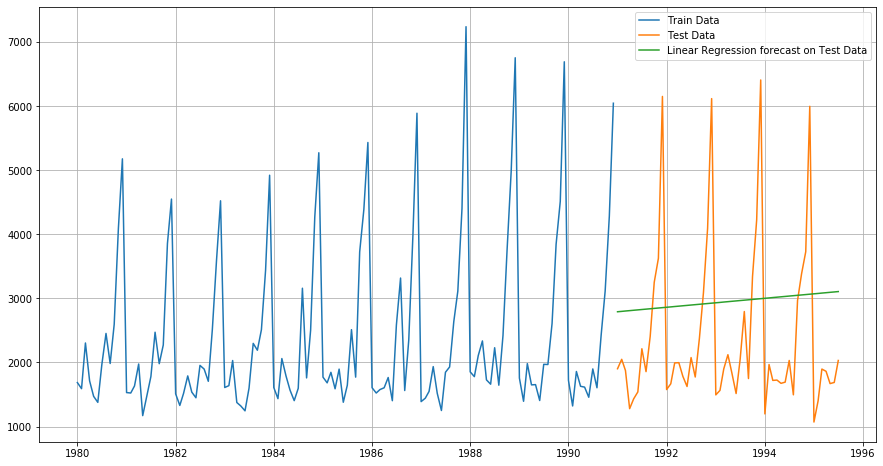

In [43]:
plt.figure(figsize=(15,8))
plt.plot(dfs_lr_train.Sparkling, label="Train Data")
plt.plot(dfs_lr_test.Sparkling, label="Test Data")
plt.plot(dfs_lr_test.RegOnTime, label="Linear Regression forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [44]:
dfs_lr_rmse = mean_squared_error(dfs_lr_test["Sparkling"],dfs_lr_test['RegOnTime'],squared=False)
print("RMSE for Linear Regression forecast model on Sparkling wine data is %3.3f" %dfs_lr_rmse)

RMSE for Linear Regression forecast model on Sparkling wine data is 1389.135


In [45]:
dfs_results = pd.concat([dfs_results,pd.DataFrame({'Test RMSE': [dfs_lr_rmse]}, index=['Linear Regression'])])

In [46]:
dfs_results

Test RMSE
Naive Model        3864.279352
Linear Regression  1389.135175

In [47]:
# Simple average

In [48]:
dfs_sa_train= dfs_train.copy()
dfs_sa_test= dfs_test.copy()

In [49]:
dfs_sa_test["Average"] = dfs_sa_train["Sparkling"].mean()

In [50]:
dfs_sa_test.head()

Sparkling      Average
YearMonth                         
1991-01-01       1902  2403.780303
1991-02-01       2049  2403.780303
1991-03-01       1874  2403.780303
1991-04-01       1279  2403.780303
1991-05-01       1432  2403.780303

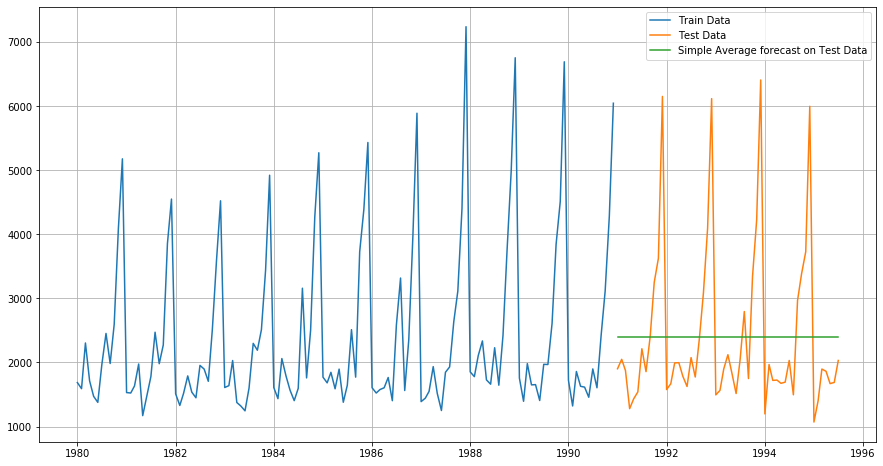

In [51]:
plt.figure(figsize=(15,8))
plt.plot(dfs_sa_train.Sparkling, label="Train Data")
plt.plot(dfs_sa_test.Sparkling, label="Test Data")
plt.plot(dfs_sa_test.Average, label="Simple Average forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [52]:
dfs_sa_rmse = mean_squared_error(dfs_sa_test["Sparkling"], dfs_sa_test["Average"], squared=False)
print("RMSE for Simple Average forecast model on Sparkling wine data is %3.3f" %dfs_sa_rmse)

RMSE for Simple Average forecast model on Sparkling wine data is 1275.082


In [53]:
dfs_results = pd.concat([dfs_results, pd.DataFrame({"Test RMSE": [dfs_sa_rmse]}, index=["Simple Average"]),])

In [54]:
dfs_results

Test RMSE
Naive Model        3864.279352
Linear Regression  1389.135175
Simple Average     1275.081804

In [55]:
# Moving Average

In [56]:
dfs_ma = dfs.copy()

In [57]:
dfs_ma["2 point moving average"] = dfs_ma["Sparkling"].rolling(2).mean()
dfs_ma["4 point moving average"] = dfs_ma["Sparkling"].rolling(4).mean()
dfs_ma["6 point moving average"] = dfs_ma["Sparkling"].rolling(6).mean()
dfs_ma["9 point moving average"] = dfs_ma["Sparkling"].rolling(9).mean()

dfs_ma.head()

Sparkling  2 point moving average  4 point moving average  \
YearMonth                                                               
1980-01-01       1686                     NaN                     NaN   
1980-02-01       1591                  1638.5                     NaN   
1980-03-01       2304                  1947.5                     NaN   
1980-04-01       1712                  2008.0                 1823.25   
1980-05-01       1471                  1591.5                 1769.50   

            6 point moving average  9 point moving average  
YearMonth                                                   
1980-01-01                     NaN                     NaN  
1980-02-01                     NaN                     NaN  
1980-03-01                     NaN                     NaN  
1980-04-01                     NaN                     NaN  
1980-05-01                     NaN                     NaN

In [58]:
dfs_ma_train = dfs_ma.loc[dfs_ma.index.year < 1991]
dfs_ma_test = dfs_ma.loc[dfs_ma.index.year >= 1991]

In [59]:
dfs_ma_train.head()

Sparkling  2 point moving average  4 point moving average  \
YearMonth                                                               
1980-01-01       1686                     NaN                     NaN   
1980-02-01       1591                  1638.5                     NaN   
1980-03-01       2304                  1947.5                     NaN   
1980-04-01       1712                  2008.0                 1823.25   
1980-05-01       1471                  1591.5                 1769.50   

            6 point moving average  9 point moving average  
YearMonth                                                   
1980-01-01                     NaN                     NaN  
1980-02-01                     NaN                     NaN  
1980-03-01                     NaN                     NaN  
1980-04-01                     NaN                     NaN  
1980-05-01                     NaN                     NaN

In [60]:
dfs_ma_test.head()

Sparkling  2 point moving average  4 point moving average  \
YearMonth                                                               
1991-01-01       1902                  3974.5                 3837.75   
1991-02-01       2049                  1975.5                 3571.00   
1991-03-01       1874                  1961.5                 2968.00   
1991-04-01       1279                  1576.5                 1776.00   
1991-05-01       1432                  1355.5                 1658.50   

            6 point moving average  9 point moving average  
YearMonth                                                   
1991-01-01             3230.000000             2705.666667  
1991-02-01             3304.000000             2753.888889  
1991-03-01             3212.333333             2800.222222  
1991-04-01             2906.166667             2731.333333  
1991-05-01             2430.500000             2712.111111

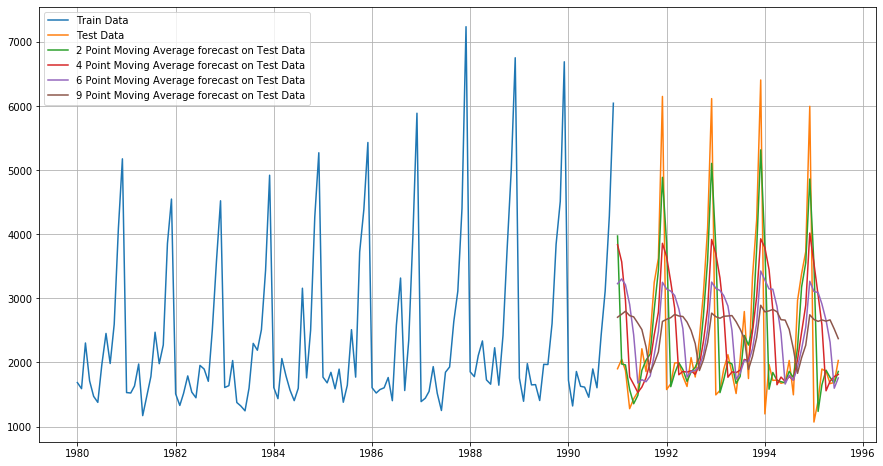

In [61]:
plt.figure(figsize=(15,8))
plt.plot(dfs_ma_train.Sparkling, label="Train Data")
plt.plot(dfs_ma_test.Sparkling, label="Test Data")
plt.plot(dfs_ma_test['2 point moving average'], label="2 Point Moving Average forecast on Test Data")
plt.plot(dfs_ma_test['4 point moving average'], label="4 Point Moving Average forecast on Test Data")
plt.plot(dfs_ma_test['6 point moving average'], label="6 Point Moving Average forecast on Test Data")
plt.plot(dfs_ma_test['9 point moving average'], label="9 Point Moving Average forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [62]:
dfs_2pma_rmse = mean_squared_error(dfs_ma_test["Sparkling"], dfs_ma_test["2 point moving average"], squared=False)
dfs_4pma_rmse = mean_squared_error(dfs_ma_test["Sparkling"], dfs_ma_test["4 point moving average"], squared=False)
dfs_6pma_rmse = mean_squared_error(dfs_ma_test["Sparkling"], dfs_ma_test["6 point moving average"], squared=False)
dfs_9pma_rmse = mean_squared_error(dfs_ma_test["Sparkling"], dfs_ma_test["9 point moving average"], squared=False)
print("RMSE for 2 point Moving Average forecast model on Sparkling wine data is %3.3f" %dfs_2pma_rmse)
print("RMSE for 4 point Moving Average forecast model on Sparkling wine data is %3.3f" %dfs_4pma_rmse)
print("RMSE for 6 point Moving Average forecast model on Sparkling wine data is %3.3f" %dfs_6pma_rmse)
print("RMSE for 9 point Moving Average forecast model on Sparkling wine data is %3.3f" %dfs_9pma_rmse)

RMSE for 2 point Moving Average forecast model on Sparkling wine data is 813.401
RMSE for 4 point Moving Average forecast model on Sparkling wine data is 1156.590
RMSE for 6 point Moving Average forecast model on Sparkling wine data is 1283.927
RMSE for 9 point Moving Average forecast model on Sparkling wine data is 1346.278


In [63]:
dfs_results = pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_2pma_rmse]},index=["2 Point Moving Average"]),])
dfs_results = pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_4pma_rmse]},index=["4 Point Moving Average"]),])
dfs_results = pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_6pma_rmse]},index=["6 Point Moving Average"]),])
dfs_results = pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_9pma_rmse]},index=["9 Point Moving Average"]),])

In [64]:
dfs_results

Test RMSE
Naive Model             3864.279352
Linear Regression       1389.135175
Simple Average          1275.081804
2 Point Moving Average   813.400684
4 Point Moving Average  1156.589694
6 Point Moving Average  1283.927428
9 Point Moving Average  1346.278315

In [65]:
# Simple Exponential Smoothing

In [66]:
dfs_ses_train= dfs_train.copy()
dfs_ses_test= dfs_test.copy()

In [67]:
dfs_ses_model= SimpleExpSmoothing(dfs_ses_train.Sparkling)
dfs_ses_autofit = dfs_ses_model.fit(optimized=True)

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [68]:
dfs_ses_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7856210776245,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
dfs_ses_test["Prediction"] = dfs_ses_autofit.forecast(steps=len(dfs_ses_test))
dfs_ses_test.head()

Sparkling   Prediction
YearMonth                         
1991-01-01       1902  2403.785621
1991-02-01       2049  2403.785621
1991-03-01       1874  2403.785621
1991-04-01       1279  2403.785621
1991-05-01       1432  2403.785621

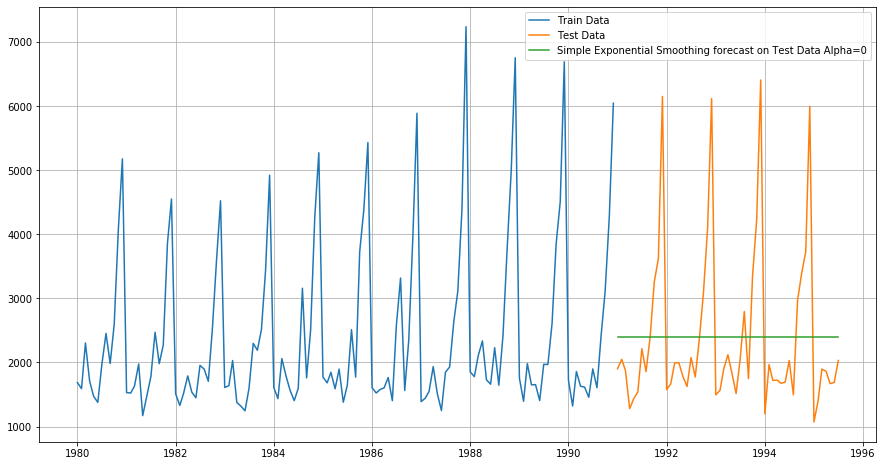

In [70]:
plt.figure(figsize=(15,8))
plt.plot(dfs_ses_train.Sparkling, label="Train Data")
plt.plot(dfs_ses_test.Sparkling, label="Test Data")
plt.plot(dfs_ses_test.Prediction, label="Simple Exponential Smoothing forecast on Test Data Alpha=0")
plt.legend(loc="best")
plt.grid();

In [71]:
dfs_ses_rmse = mean_squared_error(dfs_ses_test["Sparkling"],dfs_ses_test["Prediction"], squared=False)
print("RMSE for SES forecast model on Sparkling wine data is %3.3f" %dfs_ses_rmse)

RMSE for SES forecast model on Sparkling wine data is 1275.082


In [72]:
dfs_results= pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_ses_rmse]}, index=["Alpha=0, SES"]),])

In [73]:
dfs_results

Test RMSE
Naive Model             3864.279352
Linear Regression       1389.135175
Simple Average          1275.081804
2 Point Moving Average   813.400684
4 Point Moving Average  1156.589694
6 Point Moving Average  1283.927428
9 Point Moving Average  1346.278315
Alpha=0, SES            1275.081823

In [74]:
# Double Exponential Smoothing

In [75]:
dfs_des_train = dfs_train.copy()
dfs_des_test = dfs_test.copy()

In [76]:
dfs_des_model = Holt(dfs_des_train.Sparkling)
dfs_des_autofit = dfs_des_model.fit(optimized=True)

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [77]:
dfs_des_autofit.params

{'smoothing_level': 0.6478137983008563,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0837778875616,
 'initial_slope': 27.06051184255422,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
dfs_des_test["Prediction"] = dfs_des_autofit.forecast(steps=len(dfs_des_test))
dfs_des_test.head()

Sparkling   Prediction
YearMonth                         
1991-01-01       1902  5281.503187
1991-02-01       2049  5308.563699
1991-03-01       1874  5335.624211
1991-04-01       1279  5362.684723
1991-05-01       1432  5389.745234

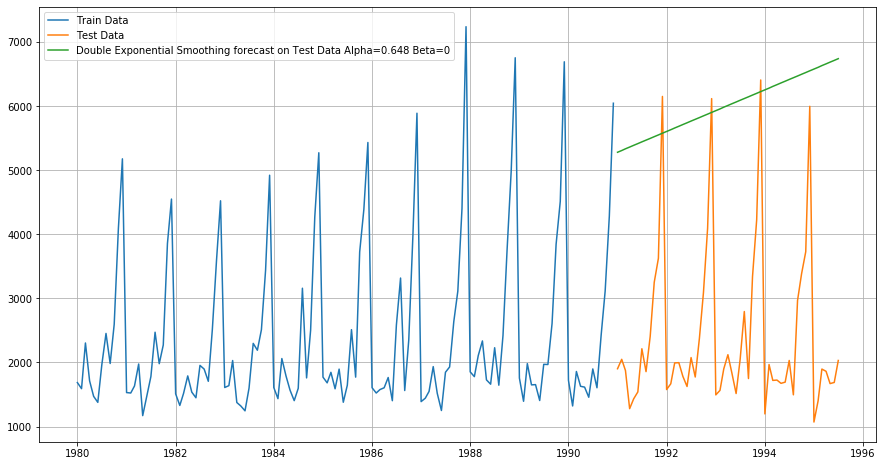

In [79]:
plt.figure(figsize=(15,8))
plt.plot(dfs_des_train.Sparkling, label="Train Data")
plt.plot(dfs_des_test.Sparkling, label="Test Data")
plt.plot(dfs_des_test.Prediction, label="Double Exponential Smoothing forecast on Test Data Alpha=0.648 Beta=0")
plt.legend(loc="best")
plt.grid();

In [80]:
dfs_des_rmse = mean_squared_error(dfs_des_test["Sparkling"],dfs_des_test["Prediction"], squared=False)
print("RMSE for DES forecast model on Sparkling wine data is %3.3f" %dfs_des_rmse)

RMSE for DES forecast model on Sparkling wine data is 3851.073


In [81]:
dfs_results= pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_des_rmse]},index=["Alpha=0.648, Beta=0, DES"]),])

In [82]:
dfs_results

Test RMSE
Naive Model               3864.279352
Linear Regression         1389.135175
Simple Average            1275.081804
2 Point Moving Average     813.400684
4 Point Moving Average    1156.589694
6 Point Moving Average    1283.927428
9 Point Moving Average    1346.278315
Alpha=0, SES              1275.081823
Alpha=0.648, Beta=0, DES  3851.072597

In [83]:
# Triple Exponential smoothing (Holt-Winters)

In [84]:
dfs_tes_train = dfs_train.copy()
dfs_tes_test = dfs_test.copy()

In [85]:
dfs_tes_model = ExponentialSmoothing(dfs_tes_train.Sparkling,trend='additive',seasonal='additive')
dfs_tes_autofit = dfs_tes_model.fit(optimized=True)

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [86]:
dfs_tes_autofit.params

{'smoothing_level': 0.08621947613454733,
 'smoothing_slope': 2.6874330863382154e-08,
 'smoothing_seasonal': 0.4763612183448062,
 'damping_slope': nan,
 'initial_level': 1684.809720734794,
 'initial_slope': 0.006601124491771914,
 'initial_seasons': array([  39.19059509,  -37.24835927,  464.88056614,  205.99095389,
        -140.66424075, -156.79570166,  338.0811185 ,  856.82160873,
         403.52711408,  971.26615796, 2401.64073231, 3426.75506275]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
dfs_tes_test["Prediction"] = dfs_tes_autofit.forecast(steps=len(dfs_tes_test))
dfs_tes_test.head()

Sparkling   Prediction
YearMonth                         
1991-01-01       1902  1532.422837
1991-02-01       2049  1241.383411
1991-03-01       1874  1726.781799
1991-04-01       1279  1584.323098
1991-05-01       1432  1494.024475

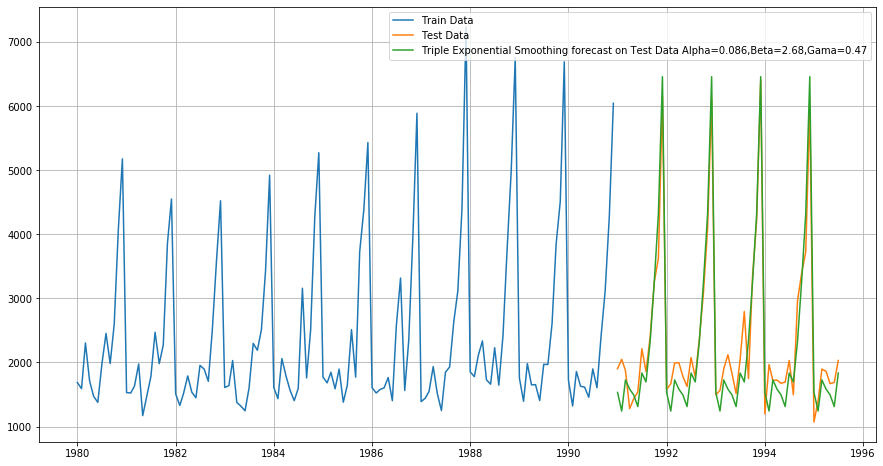

In [88]:
plt.figure(figsize=(15,8))
plt.plot(dfs_tes_train.Sparkling, label="Train Data")
plt.plot(dfs_tes_test.Sparkling, label="Test Data")
plt.plot(dfs_tes_test.Prediction, label="Triple Exponential Smoothing forecast on Test Data Alpha=0.086,Beta=2.68,Gama=0.47")
plt.legend(loc="best")
plt.grid();

In [89]:
dfs_tes_rmse = mean_squared_error(dfs_tes_test["Sparkling"],dfs_tes_test["Prediction"],squared=False)
print("RMSE for TES forecast model on Sparkling wine data is %3.3f" %dfs_tes_rmse)

RMSE for TES forecast model on Sparkling wine data is 362.732


In [90]:
dfs_results = pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_tes_rmse]},index=["Alpha=0.086, Beta=2.68, Gamma=0.47, TES"]),])

In [91]:
dfs_results

Test RMSE
Naive Model                              3864.279352
Linear Regression                        1389.135175
Simple Average                           1275.081804
2 Point Moving Average                    813.400684
4 Point Moving Average                   1156.589694
6 Point Moving Average                   1283.927428
9 Point Moving Average                   1346.278315
Alpha=0, SES                             1275.081823
Alpha=0.648, Beta=0, DES                 3851.072597
Alpha=0.086, Beta=2.68, Gamma=0.47, TES   362.731657

In [92]:
# Stationary Check

In [93]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

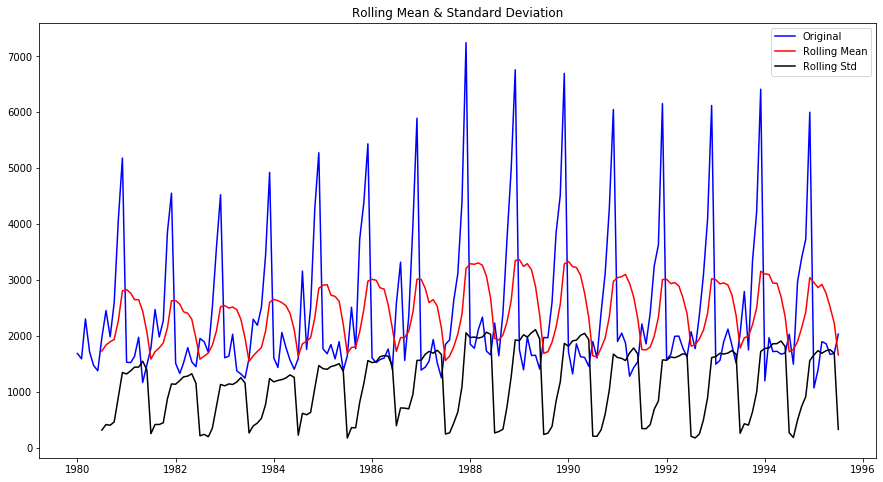

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [94]:
test_stationarity(dfs.Sparkling)

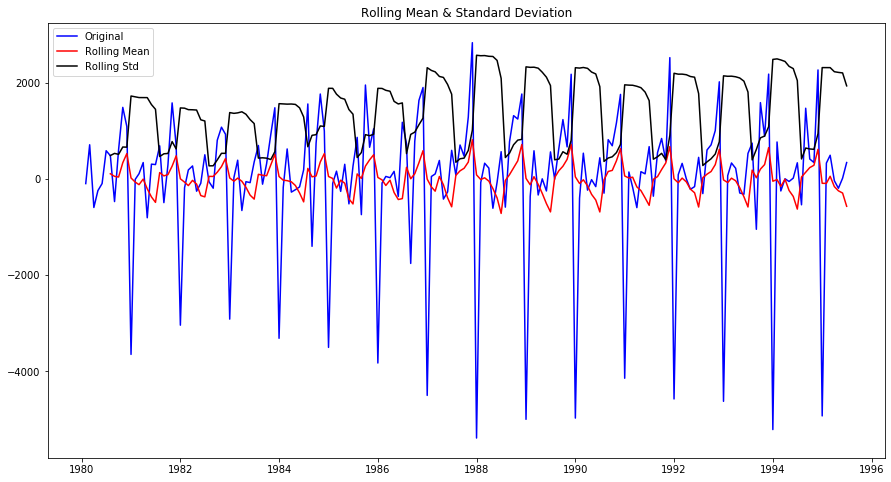

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [95]:
test_stationarity(dfs['Sparkling'].diff().dropna())

In [96]:
# Checking for stationarity on train data

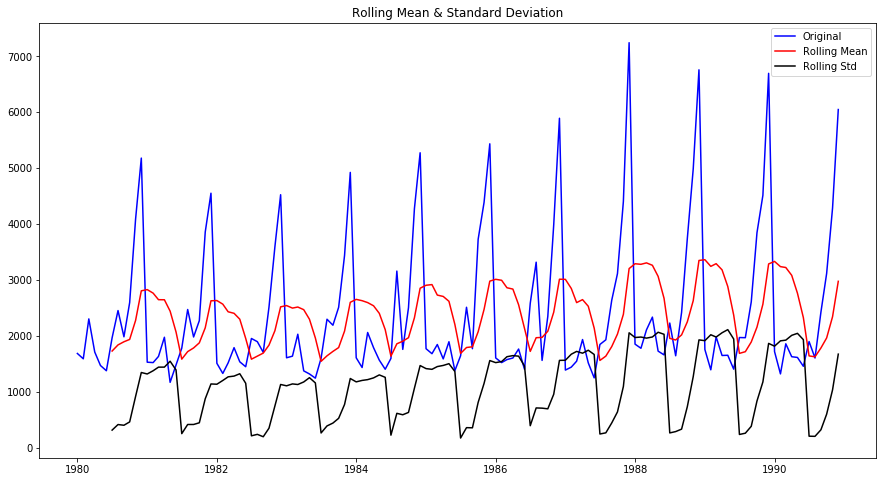

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [97]:
test_stationarity(dfs_train)

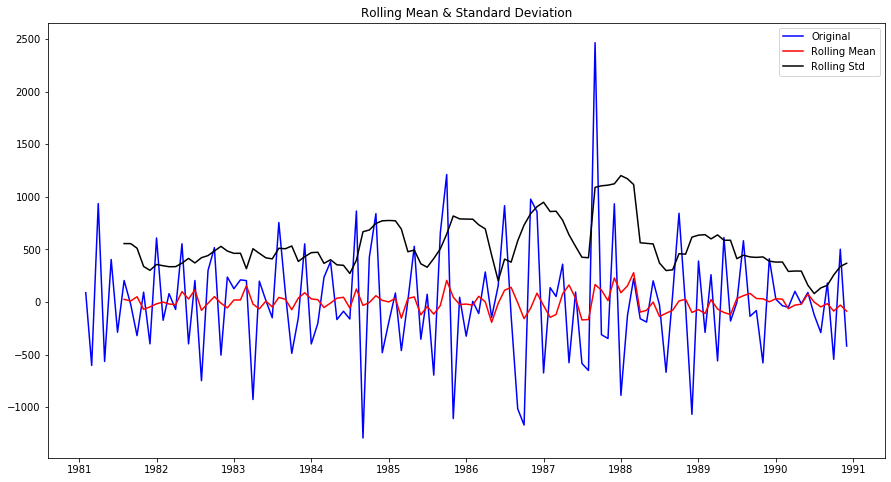

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [98]:
test_stationarity(dfs_train.diff(12).diff().dropna())

In [99]:
# Automated ARIMA SARIMA

In [100]:
# 1 Automated ARIMA

In [101]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [102]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [103]:
for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(dfs_train['Sparkling'].values,order=param,enforce_stationarity=False,enforce_invertibility=False).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2251.3597196862966
ARIMA(0, 1, 1) - AIC:2230.1629078505857
ARIMA(0, 1, 2) - AIC:2187.4410101687326
ARIMA(0, 1, 3) - AIC:2168.092540844262
ARIMA(1, 1, 0) - AIC:2250.3181267386713
ARIMA(1, 1, 1) - AIC:2204.9340491545754
ARIMA(1, 1, 2) - AIC:2188.4633450504516
ARIMA(1, 1, 3) - AIC:2171.0264039774365
ARIMA(2, 1, 0) - AIC:2227.302761872421
ARIMA(2, 1, 1) - AIC:2199.8586131455045
ARIMA(2, 1, 2) - AIC:2176.868114733436
ARIMA(2, 1, 3) - AIC:2171.0395890806103
ARIMA(3, 1, 0) - AIC:2208.40250139061
ARIMA(3, 1, 1) - AIC:2188.222098334457
ARIMA(3, 1, 2) - AIC:2187.314726545156
ARIMA(3, 1, 3) - AIC:2155.774954204599


In [104]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
15  (3, 1, 3)  2155.774954
3   (0, 1, 3)  2168.092541
7   (1, 1, 3)  2171.026404
11  (2, 1, 3)  2171.039589
10  (2, 1, 2)  2176.868115
14  (3, 1, 2)  2187.314727
2   (0, 1, 2)  2187.441010
13  (3, 1, 1)  2188.222098
6   (1, 1, 2)  2188.463345
9   (2, 1, 1)  2199.858613
5   (1, 1, 1)  2204.934049
12  (3, 1, 0)  2208.402501
8   (2, 1, 0)  2227.302762
1   (0, 1, 1)  2230.162908
4   (1, 1, 0)  2250.318127
0   (0, 1, 0)  2251.359720

In [105]:
auto_ARIMA = sm.tsa.arima.ARIMA(dfs_train.Sparkling, order=(0,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1112.997
Date:                Sun, 28 May 2023   AIC                           2233.995
Time:                        06:44:20   BIC                           2245.496
Sample:                    01-01-1980   HQIC                          2238.668
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4677      0.804     -0.582      0.561      -2.044       1.108
ma.L2         -0.3782      0.537     -0.704      0.481      -1.431       0.674
ma.L3         -0.1532      0.217     -0.706      0.4

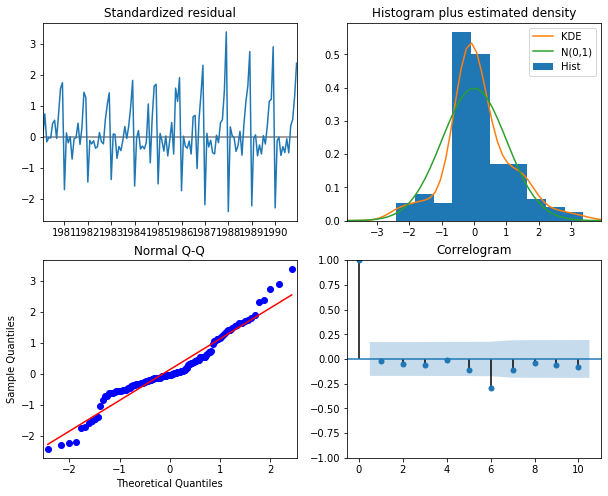

In [106]:
results_auto_ARIMA.plot_diagnostics(figsize=(10, 8));

In [107]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(dfs_test))

In [108]:
predicted_auto_ARIMA

1991-01-01    4096.080807
1991-02-01    2823.921664
1991-03-01    2401.957202
1991-04-01    2401.957202
1991-05-01    2401.957202
1991-06-01    2401.957202
1991-07-01    2401.957202
1991-08-01    2401.957202
1991-09-01    2401.957202
1991-10-01    2401.957202
1991-11-01    2401.957202
1991-12-01    2401.957202
1992-01-01    2401.957202
1992-02-01    2401.957202
1992-03-01    2401.957202
1992-04-01    2401.957202
1992-05-01    2401.957202
1992-06-01    2401.957202
1992-07-01    2401.957202
1992-08-01    2401.957202
1992-09-01    2401.957202
1992-10-01    2401.957202
1992-11-01    2401.957202
1992-12-01    2401.957202
1993-01-01    2401.957202
1993-02-01    2401.957202
1993-03-01    2401.957202
1993-04-01    2401.957202
1993-05-01    2401.957202
1993-06-01    2401.957202
1993-07-01    2401.957202
1993-08-01    2401.957202
1993-09-01    2401.957202
1993-10-01    2401.957202
1993-11-01    2401.957202
1993-12-01    2401.957202
1994-01-01    2401.957202
1994-02-01    2401.957202
1994-03-01  

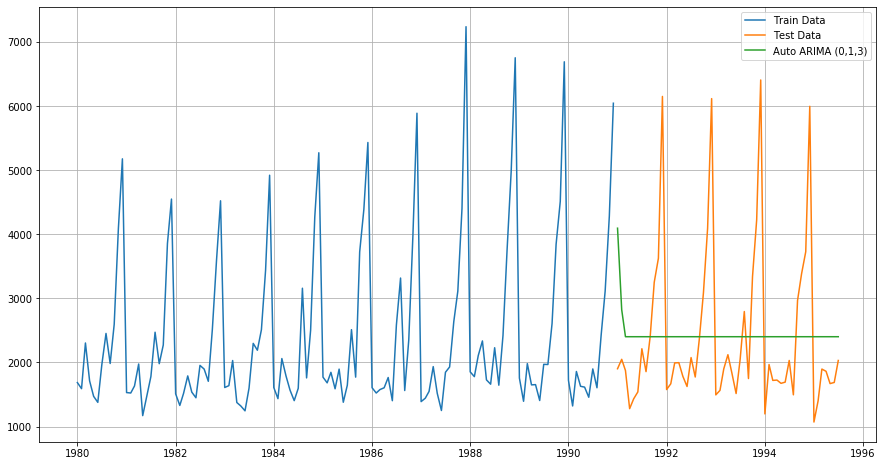

In [109]:
plt.figure(figsize=(15,8))
plt.plot(dfs_train.Sparkling, label="Train Data")
plt.plot(dfs_test.Sparkling, label="Test Data")
plt.plot(predicted_auto_ARIMA, label="Auto ARIMA (0,1,3)")
plt.legend(loc="best")
plt.grid();

In [110]:
dfs_auto_ARIMA_rmse=mean_squared_error(dfs_test["Sparkling"],predicted_auto_ARIMA,squared=False)
print("RMSE for Auto ARIMA forecast model on Sparkling wine data is %3.3f" %dfs_auto_ARIMA_rmse)

RMSE for Auto ARIMA forecast model on Sparkling wine data is 1310.517


In [111]:
dfs_results = pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_auto_ARIMA_rmse]},index=["Auto ARIMA(0,1,3)"]),])

In [112]:
dfs_results

Test RMSE
Naive Model                              3864.279352
Linear Regression                        1389.135175
Simple Average                           1275.081804
2 Point Moving Average                    813.400684
4 Point Moving Average                   1156.589694
6 Point Moving Average                   1283.927428
9 Point Moving Average                   1346.278315
Alpha=0, SES                             1275.081823
Alpha=0.648, Beta=0, DES                 3851.072597
Alpha=0.086, Beta=2.68, Gamma=0.47, TES   362.731657
Auto ARIMA(0,1,3)                        1310.517315

In [113]:
auto_ARIMA = sm.tsa.arima.ARIMA(dfs_train.Sparkling, order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1103.722
Date:                Sun, 28 May 2023   AIC                           2221.444
Time:                        06:44:22   BIC                           2241.570
Sample:                    01-01-1980   HQIC                          2229.622
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4753      0.143      3.327      0.001       0.195       0.755
ar.L2         -0.9849      0.056    -17.733      0.000      -1.094      -0.876
ar.L3          0.4820      0.118      4.074      0.0

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


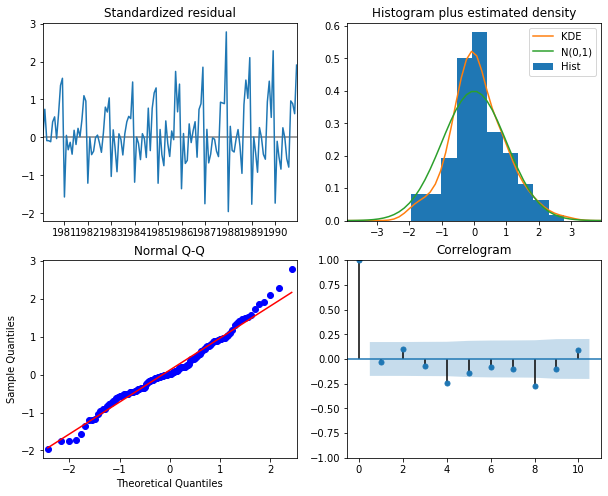

In [114]:
results_auto_ARIMA.plot_diagnostics(figsize=(10, 8));

In [115]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(dfs_test))

In [116]:
predicted_auto_ARIMA

1991-01-01    3522.242571
1991-02-01    2547.804450
1991-03-01    3120.671024
1991-04-01    3135.708661
1991-05-01    2108.914387
1991-06-01    1882.219917
1991-07-01    2793.051719
1991-08-01    2954.294963
1991-09-01    2024.546955
1991-10-01    1862.881603
1991-11-01    2779.511108
1991-12-01    2926.239092
1992-01-01    2015.227520
1992-02-01    1879.558566
1992-03-01    2783.092827
1992-04-01    2907.023467
1992-05-01    2010.605579
1992-06-01    1898.014489
1992-07-01    2787.154545
1992-08-01    2888.548124
1992-09-01    2006.720219
1992-10-01    1916.322737
1992-11-01    2790.777424
1992-12-01    2870.364710
1993-01-01    2003.334654
1993-02-01    1934.369467
1993-03-01    2793.924460
1993-04-01    2852.453627
1993-05-01    2000.421141
1993-06-01    1952.142959
1993-07-01    2796.607958
1993-08-01    2834.818895
1993-09-01    1997.963821
1993-10-01    1969.637647
1993-11-01    2798.842832
1993-12-01    2817.465440
1994-01-01    1995.947664
1994-02-01    1986.848724
1994-03-01  

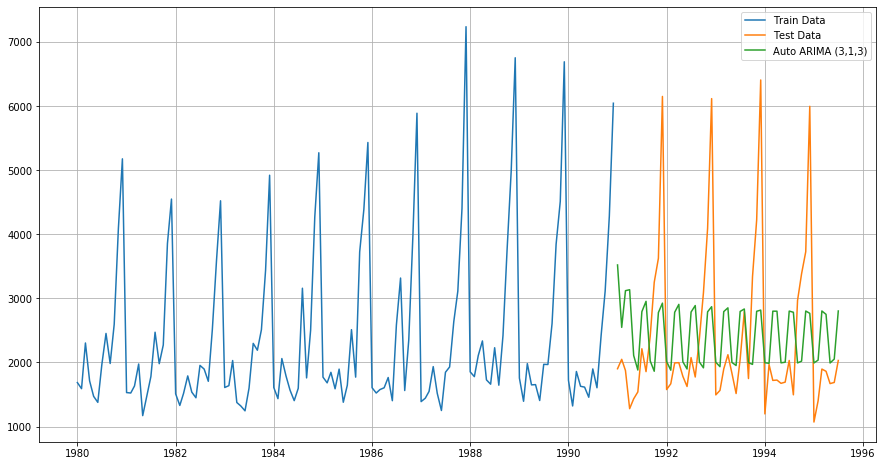

In [117]:
plt.figure(figsize=(15,8))
plt.plot(dfs_train.Sparkling, label="Train Data")
plt.plot(dfs_test.Sparkling, label="Test Data")
plt.plot(predicted_auto_ARIMA, label="Auto ARIMA (3,1,3)")
plt.legend(loc="best")
plt.grid();

In [118]:
dfs_auto_ARIMA_rmse=mean_squared_error(dfs_test["Sparkling"],predicted_auto_ARIMA,squared=False)
print("RMSE for Auto ARIMA forecast model on Sparkling wine data is %3.3f" %dfs_auto_ARIMA_rmse)

RMSE for Auto ARIMA forecast model on Sparkling wine data is 1229.645


In [119]:
dfs_results = pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_auto_ARIMA_rmse]},index=["Auto ARIMA(3,1,3)"]),])

In [120]:
dfs_results

Test RMSE
Naive Model                              3864.279352
Linear Regression                        1389.135175
Simple Average                           1275.081804
2 Point Moving Average                    813.400684
4 Point Moving Average                   1156.589694
6 Point Moving Average                   1283.927428
9 Point Moving Average                   1346.278315
Alpha=0, SES                             1275.081823
Alpha=0.648, Beta=0, DES                 3851.072597
Alpha=0.086, Beta=2.68, Gamma=0.47, TES   362.731657
Auto ARIMA(0,1,3)                        1310.517315
Auto ARIMA(3,1,3)                        1229.644724

In [121]:
# 2 Automated SARIMA

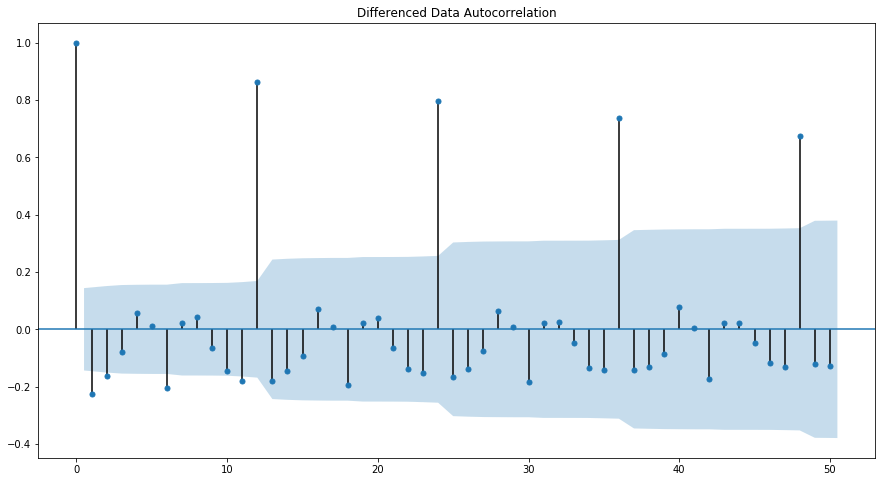

In [122]:
plot_acf(dfs['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [123]:
# We will take seasonality 12

In [124]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [125]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [126]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(dfs_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  
                                            enforce_invertibility=False) 
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684463
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236037
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388562
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791319
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158610038
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920795
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505857
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956671
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.711613971803
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838025
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193762686
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144280967
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417426
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508575959
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018832642962
SARIMA(0, 1, 2)

In [127]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.929669
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [128]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(dfs_train['Sparkling'].values,
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 28 May 2023   AIC                           1555.584
Time:                                    06:46:19   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

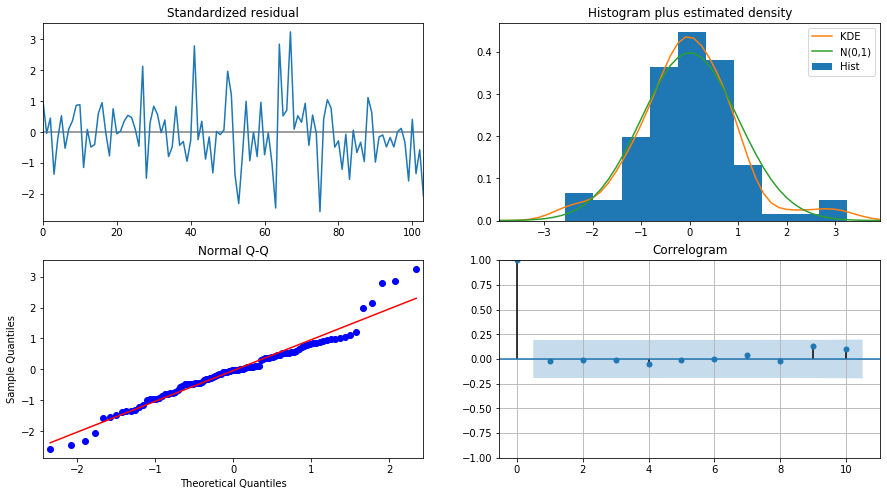

In [129]:
results_auto_SARIMA_12.plot_diagnostics()
plt.grid()

In [130]:
dfs_predicted_auto_SARIMA = results_auto_SARIMA_12.get_forecast(steps=len(dfs_test))

In [131]:
dfs_predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.364146  388.345557     566.220841    2088.507451
1  1315.100345  402.009781     527.175652    2103.025037
2  1621.570193  402.003388     833.658031    2409.482354
3  1598.854330  407.241640     800.675383    2397.033278
4  1392.671880  407.971816     593.061814    2192.281946

In [132]:
dfs_auto_SARIMA_rmse = mean_squared_error(dfs_test.Sparkling,dfs_predicted_auto_SARIMA.predicted_mean,squared=False)
print("RMSE for Auto SARIMA forecast model on Sparkling wine data is %3.3f" %dfs_auto_SARIMA_rmse)

RMSE for Auto SARIMA forecast model on Sparkling wine data is 528.636


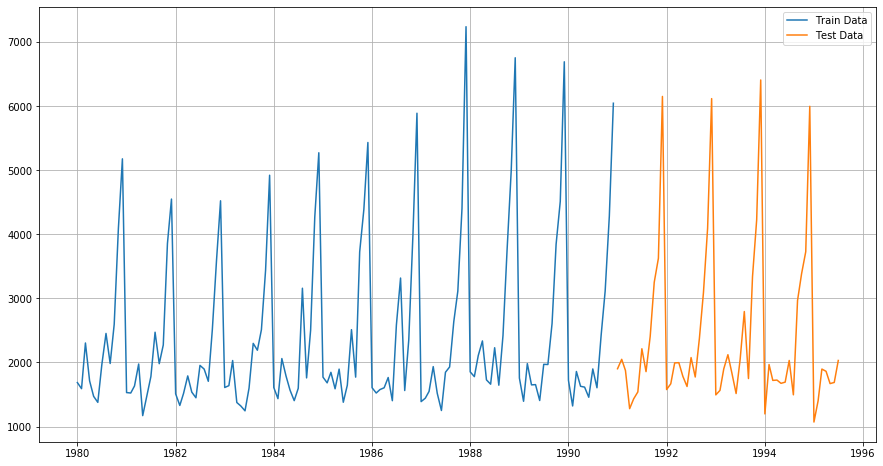

In [133]:
plt.figure(figsize=(15,8))
plt.plot(dfs_train.Sparkling, label="Train Data")
plt.plot(dfs_test.Sparkling, label="Test Data")
#plt.plot(dfs_predicted_auto_SARIMA, label="Auto SARIMA (1,1,2)(1,0,2,12)")
plt.legend(loc="best")
plt.grid();

In [134]:
dfs_results= pd.concat([dfs_results,pd.DataFrame({"Test RMSE": [dfs_auto_SARIMA_rmse]},index=["Auto SARIMAX(1,1,2)(1,0,2,12)"]),])

In [135]:
dfs_results

Test RMSE
Naive Model                              3864.279352
Linear Regression                        1389.135175
Simple Average                           1275.081804
2 Point Moving Average                    813.400684
4 Point Moving Average                   1156.589694
6 Point Moving Average                   1283.927428
9 Point Moving Average                   1346.278315
Alpha=0, SES                             1275.081823
Alpha=0.648, Beta=0, DES                 3851.072597
Alpha=0.086, Beta=2.68, Gamma=0.47, TES   362.731657
Auto ARIMA(0,1,3)                        1310.517315
Auto ARIMA(3,1,3)                        1229.644724
Auto SARIMAX(1,1,2)(1,0,2,12)             528.635883

In [136]:
# RMSE table

In [137]:
dfs_results.sort_values(by="Test RMSE", ascending=True)

Test RMSE
Alpha=0.086, Beta=2.68, Gamma=0.47, TES   362.731657
Auto SARIMAX(1,1,2)(1,0,2,12)             528.635883
2 Point Moving Average                    813.400684
4 Point Moving Average                   1156.589694
Auto ARIMA(3,1,3)                        1229.644724
Simple Average                           1275.081804
Alpha=0, SES                             1275.081823
6 Point Moving Average                   1283.927428
Auto ARIMA(0,1,3)                        1310.517315
9 Point Moving Average                   1346.278315
Linear Regression                        1389.135175
Alpha=0.648, Beta=0, DES                 3851.072597
Naive Model                              3864.279352

# Rose Wine sales data

In [138]:
dfr=pd.read_csv("Rose.csv", parse_dates=True, index_col="YearMonth")

In [139]:
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [140]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [141]:
dfr.isnull().sum()

Rose    2
dtype: int64

In [142]:
dfr.interpolate(inplace=True)

In [143]:
dfr.isnull().sum()

Rose    0
dtype: int64

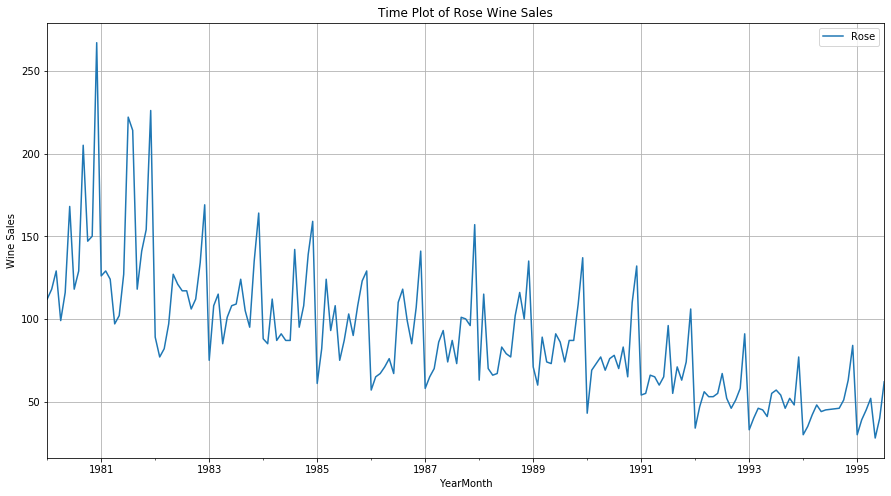

In [144]:
rcParams['figure.figsize']=15,8
dfr.plot()
plt.title("Time Plot of Rose Wine Sales")
#plt.xlabel("Years")
plt.ylabel("Wine Sales")
plt.grid();

In [145]:
# 2 Exploratory data analysis

In [146]:
dfr.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

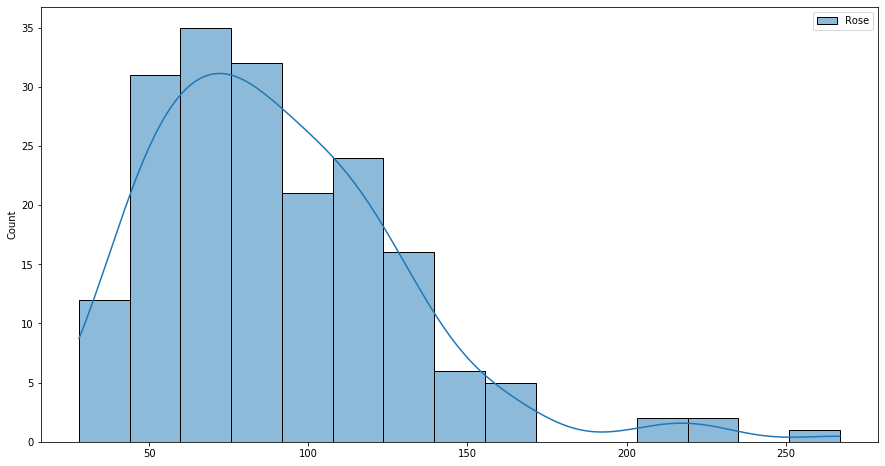

In [147]:
sns.histplot(dfr, kde=True)

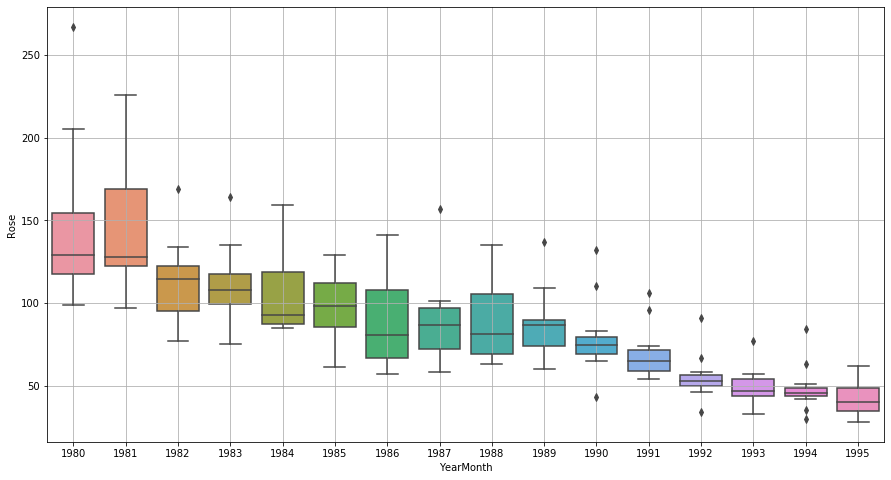

In [148]:
# Yearly Plot
sns.boxplot(x=dfr.index.year, y=dfr.Rose,)
plt.grid();

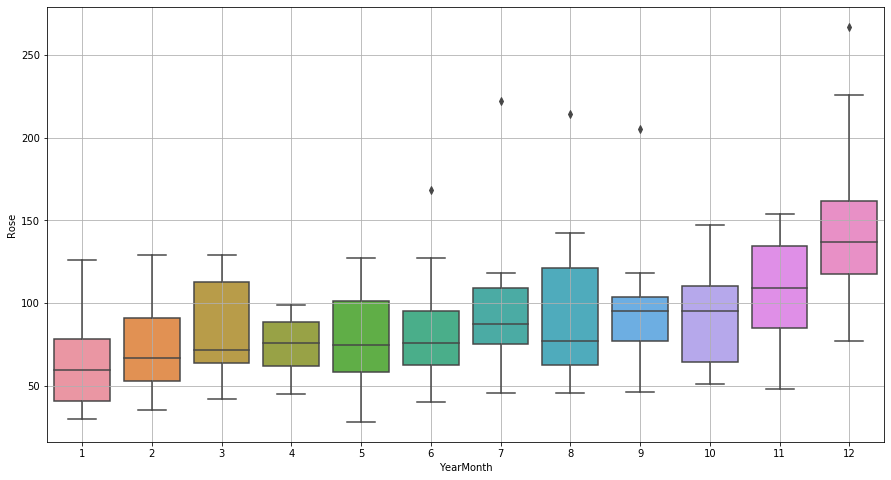

In [149]:
# Monthly Plot
sns.boxplot(x=dfr.index.month, y=dfr.Rose)
plt.grid()

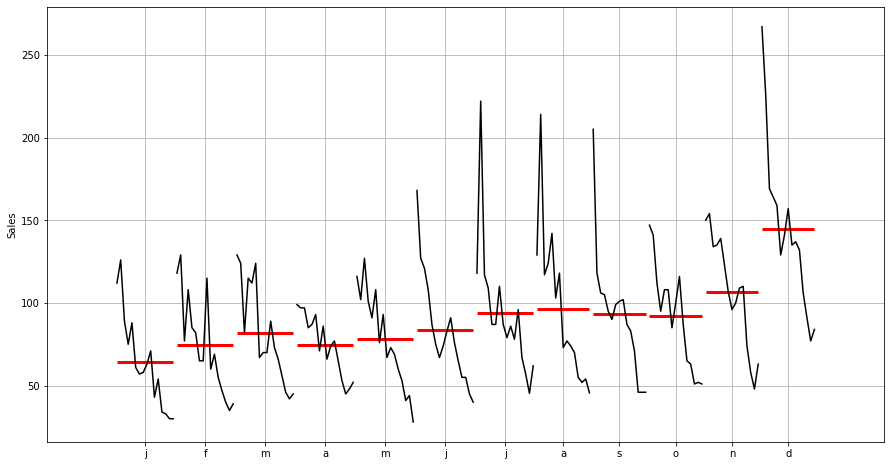

In [150]:
# Month Plot
from statsmodels.graphics.tsaplots import month_plot

month_plot(dfr.Rose, ylabel='Sales')
plt.grid();

In [151]:
# Monthly wine sales across years

In [152]:
monthly_sales_across_years = pd.pivot_table(dfr, values = 'Rose', columns = dfr.index.month, index = dfr.index.year)
monthly_sales_across_years.style.highlight_max()

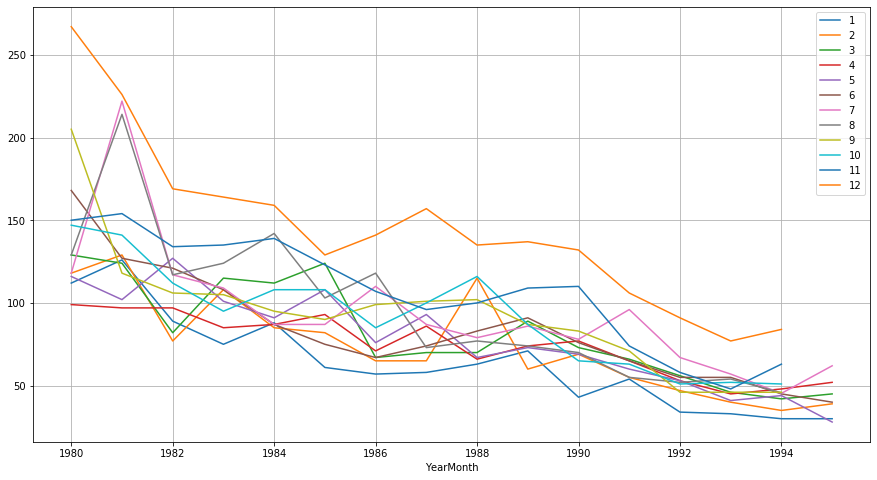

In [153]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

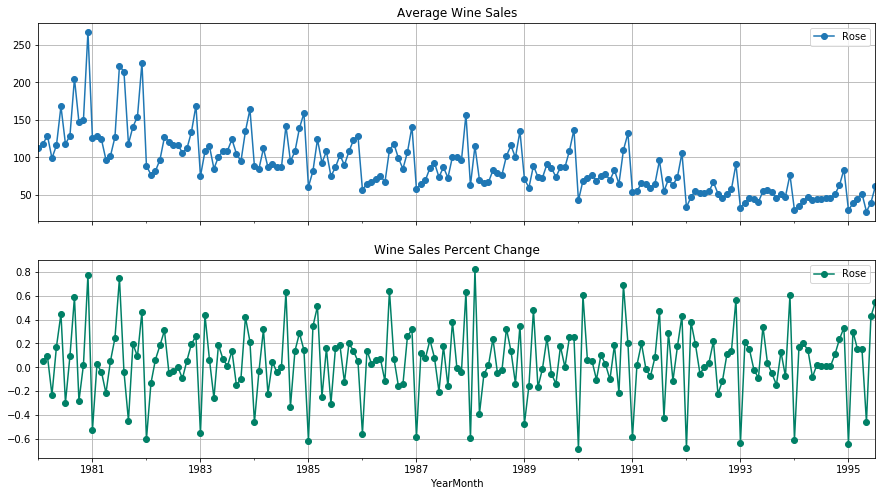

In [154]:
# average RetailSales, and precent change
average    = dfr.groupby(dfr.index)["Rose"].mean()
pct_change = dfr.groupby(dfr.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True)

In [155]:
# Decomposition

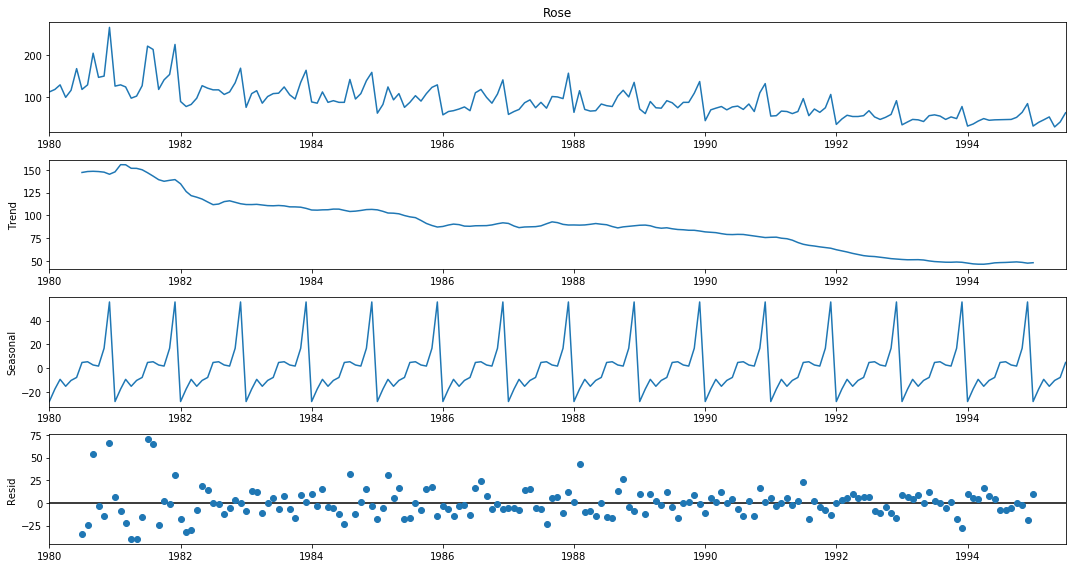

In [156]:
# Additive Decomposition
decomposition= seasonal_decompose(dfr.Rose, model='additive')
decomposition.plot();
#plt.xlabel('Year');

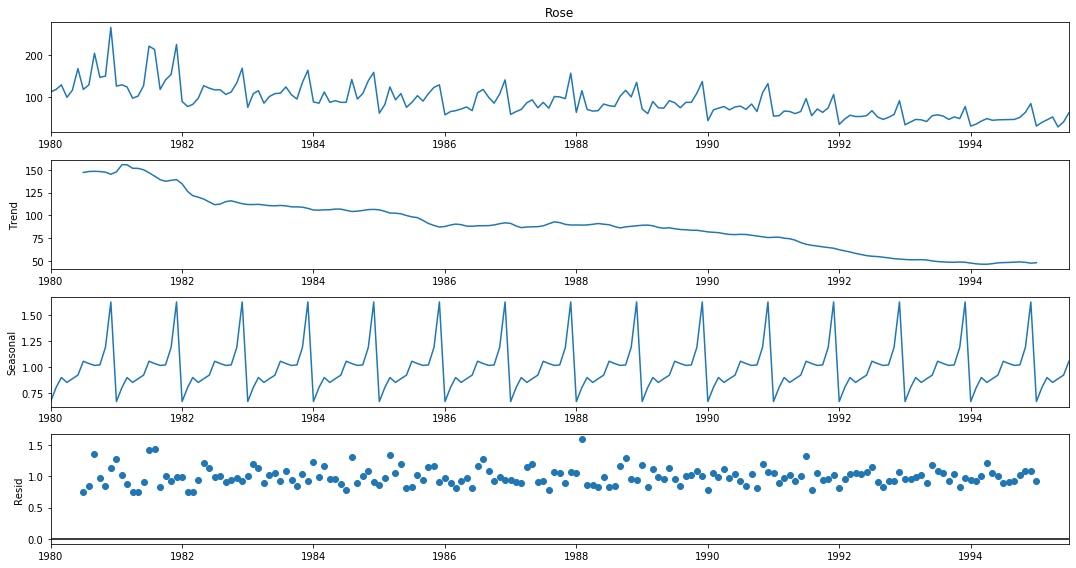

In [157]:
# Multiplicative Decomposition
decomposition= seasonal_decompose(dfr.Rose, model='multiplicative')
decomposition.plot();

In [158]:
# Split the data into train and test

In [159]:
dfr_train = dfr.loc[dfr.index.year < 1991]
dfr_test = dfr.loc[dfr.index.year >= 1991]

In [160]:
from IPython.display import display
print("Shape of the training data is")
display(dfr_train.shape)
print("Shape of the test data is") 
display(dfr_test.shape)

Shape of the training data is


(132, 1)

Shape of the test data is


(55, 1)

In [161]:
print("First few rows of the training data is")
display(dfr_train.head())
print("First Few rows of the test data is") 
display(dfr_test.head())
print("Last few rows of the training data is")
display(dfr_train.tail())
print("Last Few rows of the test data is") 
display(dfr_test.tail())

First few rows of the training data is


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

First Few rows of the test data is


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of the training data is


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

Last Few rows of the test data is


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

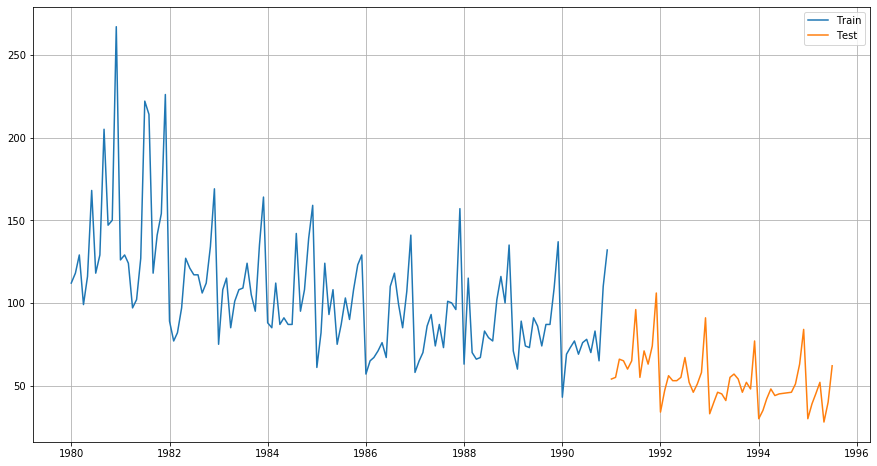

In [162]:
plt.figure(figsize=(15,8))
plt.plot(dfr_train, label="Train")
plt.plot(dfr_test, label="Test")
plt.legend(loc="best")
plt.grid();

In [163]:
# Exponential Smoothing Methods

In [164]:
# Naive Forecast

In [165]:
dfr_naive_train=dfr_train.copy()
dfr_naive_test=dfr_test.copy()

In [166]:
dfr_naive_test['Naive'] = np.asarray(dfr_naive_train.iloc[len(dfr_naive_train) - 1])[0]
dfr_naive_test.head()

Rose  Naive
YearMonth              
1991-01-01  54.0  132.0
1991-02-01  55.0  132.0
1991-03-01  66.0  132.0
1991-04-01  65.0  132.0
1991-05-01  60.0  132.0

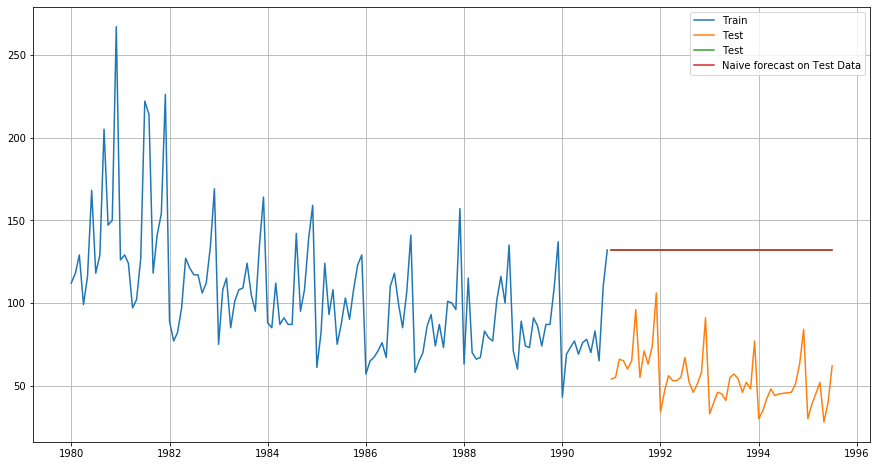

In [167]:
plt.figure(figsize=(15,8))
plt.plot(dfr_naive_train, label="Train")
plt.plot(dfr_naive_test, label="Test")
plt.plot(dfr_naive_test['Naive'], label="Naive forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [168]:
dfr_naive_rmse = mean_squared_error(dfr_naive_test["Rose"],dfr_naive_test['Naive'],squared=False)
print("RMSE for Naive forecast model on Rose wine data is %3.3f" %dfr_naive_rmse)

RMSE for Naive forecast model on Rose wine data is 79.719


In [169]:
dfr_results = pd.DataFrame({'Test RMSE': [dfr_naive_rmse]},
                                index=['Naive Model'])

In [170]:
dfr_results

Test RMSE
Naive Model  79.718773

In [171]:
# Linear Regression

In [172]:
dfr_lr_train= dfr_train.copy()
dfr_lr_test= dfr_test.copy()

In [173]:
dfr_lr_train["Time"] = [i + 1 for i in range(len(dfr_lr_train))]
dfr_lr_test["Time"] = [i + 133 for i in range(len(dfr_lr_test))]

In [174]:
print(dfr_lr_train.head())
print(dfr_lr_train.tail())

             Rose  Time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5
             Rose  Time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132


In [175]:
print(dfr_lr_test.head())
print(dfr_lr_test.tail())

            Rose  Time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137
            Rose  Time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187


In [176]:
dfr_lr = LinearRegression()
dfr_lr.fit(dfr_lr_train[["Time"]], dfr_lr_train["Rose"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
dfr_lr_test["RegOnTime"] = dfr_lr.predict(dfr_lr_test[["Time"]])

In [178]:
dfr_lr_test["RegOnTime"]

YearMonth
1991-01-01    72.063266
1991-02-01    71.568888
1991-03-01    71.074511
1991-04-01    70.580133
1991-05-01    70.085755
1991-06-01    69.591377
1991-07-01    69.096999
1991-08-01    68.602621
1991-09-01    68.108243
1991-10-01    67.613866
1991-11-01    67.119488
1991-12-01    66.625110
1992-01-01    66.130732
1992-02-01    65.636354
1992-03-01    65.141976
1992-04-01    64.647598
1992-05-01    64.153220
1992-06-01    63.658843
1992-07-01    63.164465
1992-08-01    62.670087
1992-09-01    62.175709
1992-10-01    61.681331
1992-11-01    61.186953
1992-12-01    60.692575
1993-01-01    60.198198
1993-02-01    59.703820
1993-03-01    59.209442
1993-04-01    58.715064
1993-05-01    58.220686
1993-06-01    57.726308
1993-07-01    57.231930
1993-08-01    56.737553
1993-09-01    56.243175
1993-10-01    55.748797
1993-11-01    55.254419
1993-12-01    54.760041
1994-01-01    54.265663
1994-02-01    53.771285
1994-03-01    53.276908
1994-04-01    52.782530
1994-05-01    52.288152
1994-0

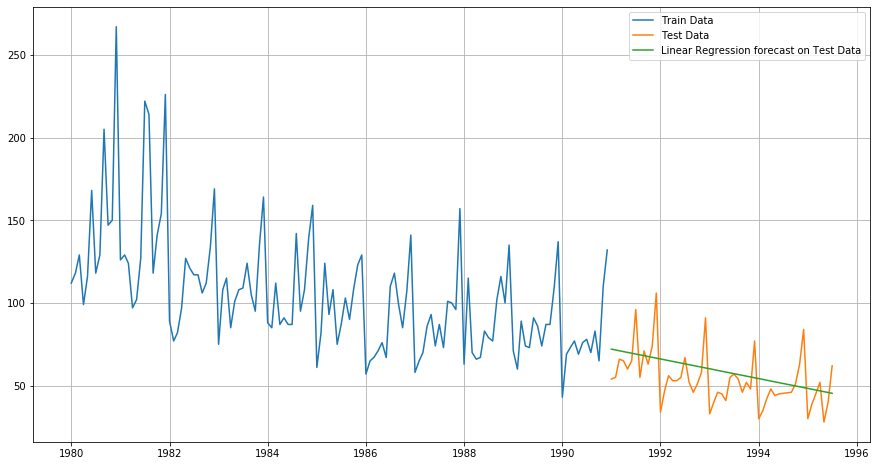

In [179]:
plt.figure(figsize=(15,8))
plt.plot(dfr_lr_train.Rose, label="Train Data")
plt.plot(dfr_lr_test.Rose, label="Test Data")
plt.plot(dfr_lr_test.RegOnTime, label="Linear Regression forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [180]:
dfr_lr_rmse = mean_squared_error(dfr_lr_test["Rose"],dfr_lr_test['RegOnTime'],squared=False)
print("RMSE for Linear Regression forecast model on Rose wine data is %3.3f" %dfr_lr_rmse)

RMSE for Linear Regression forecast model on Rose wine data is 15.269


In [181]:
dfr_results = pd.concat([dfr_results,pd.DataFrame({'Test RMSE': [dfr_lr_rmse]}, index=['Linear Regression'])])

In [182]:
dfr_results

Test RMSE
Naive Model        79.718773
Linear Regression  15.268955

In [183]:
# Simple average

In [184]:
dfr_sa_train= dfr_train.copy()
dfr_sa_test= dfr_test.copy()

In [185]:
dfr_sa_test["Average"] = dfr_sa_train["Rose"].mean()

In [186]:
dfr_sa_test.head()

Rose     Average
YearMonth                   
1991-01-01  54.0  104.939394
1991-02-01  55.0  104.939394
1991-03-01  66.0  104.939394
1991-04-01  65.0  104.939394
1991-05-01  60.0  104.939394

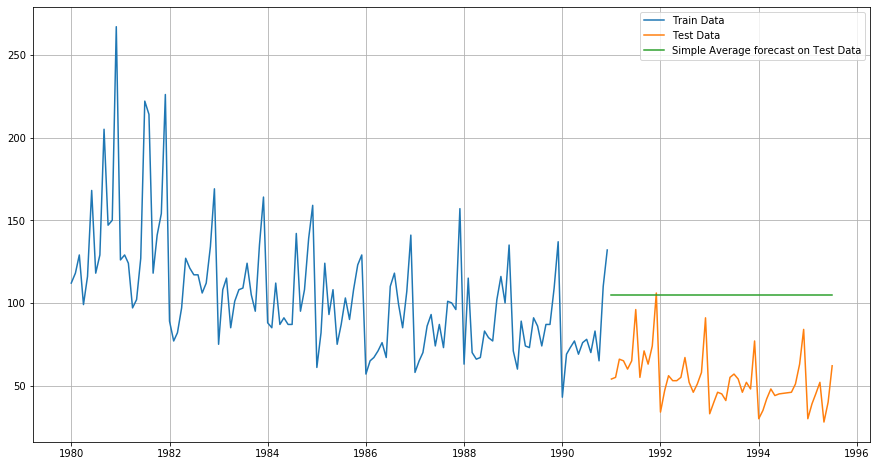

In [187]:
plt.figure(figsize=(15,8))
plt.plot(dfr_sa_train.Rose, label="Train Data")
plt.plot(dfr_sa_test.Rose, label="Test Data")
plt.plot(dfr_sa_test.Average, label="Simple Average forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [188]:
dfr_sa_rmse = mean_squared_error(dfr_sa_test["Rose"], dfr_sa_test["Average"], squared=False)
print("RMSE for Simple Average forecast model on Rose wine data is %3.3f" %dfr_sa_rmse)

RMSE for Simple Average forecast model on Rose wine data is 53.461


In [189]:
dfr_results = pd.concat([dfr_results, pd.DataFrame({"Test RMSE": [dfr_sa_rmse]}, index=["Simple Average"]),])

In [190]:
dfr_results

Test RMSE
Naive Model        79.718773
Linear Regression  15.268955
Simple Average     53.460570

In [191]:
# Moving Average

In [192]:
dfr_ma = dfr.copy()

In [193]:
dfr_ma["2 point moving average"] = dfr_ma["Rose"].rolling(2).mean()
dfr_ma["4 point moving average"] = dfr_ma["Rose"].rolling(4).mean()
dfr_ma["6 point moving average"] = dfr_ma["Rose"].rolling(6).mean()
dfr_ma["9 point moving average"] = dfr_ma["Rose"].rolling(9).mean()

dfr_ma.head()

Rose  2 point moving average  4 point moving average  \
YearMonth                                                           
1980-01-01  112.0                     NaN                     NaN   
1980-02-01  118.0                   115.0                     NaN   
1980-03-01  129.0                   123.5                     NaN   
1980-04-01   99.0                   114.0                   114.5   
1980-05-01  116.0                   107.5                   115.5   

            6 point moving average  9 point moving average  
YearMonth                                                   
1980-01-01                     NaN                     NaN  
1980-02-01                     NaN                     NaN  
1980-03-01                     NaN                     NaN  
1980-04-01                     NaN                     NaN  
1980-05-01                     NaN                     NaN

In [194]:
dfr_ma_train = dfr_ma.loc[dfr_ma.index.year < 1991]
dfr_ma_test = dfr_ma.loc[dfr_ma.index.year >= 1991]

In [195]:
dfr_ma_train.head()

Rose  2 point moving average  4 point moving average  \
YearMonth                                                           
1980-01-01  112.0                     NaN                     NaN   
1980-02-01  118.0                   115.0                     NaN   
1980-03-01  129.0                   123.5                     NaN   
1980-04-01   99.0                   114.0                   114.5   
1980-05-01  116.0                   107.5                   115.5   

            6 point moving average  9 point moving average  
YearMonth                                                   
1980-01-01                     NaN                     NaN  
1980-02-01                     NaN                     NaN  
1980-03-01                     NaN                     NaN  
1980-04-01                     NaN                     NaN  
1980-05-01                     NaN                     NaN

In [196]:
dfr_ma_test.head()

Rose  2 point moving average  4 point moving average  \
YearMonth                                                          
1991-01-01  54.0                    93.0                   90.25   
1991-02-01  55.0                    54.5                   87.75   
1991-03-01  66.0                    60.5                   76.75   
1991-04-01  65.0                    65.5                   60.00   
1991-05-01  60.0                    62.5                   61.50   

            6 point moving average  9 point moving average  
YearMonth                                                   
1991-01-01               85.666667               81.888889  
1991-02-01               83.166667               80.333333  
1991-03-01               80.333333               79.222222  
1991-04-01               80.333333               77.777778  
1991-05-01               72.000000               76.666667

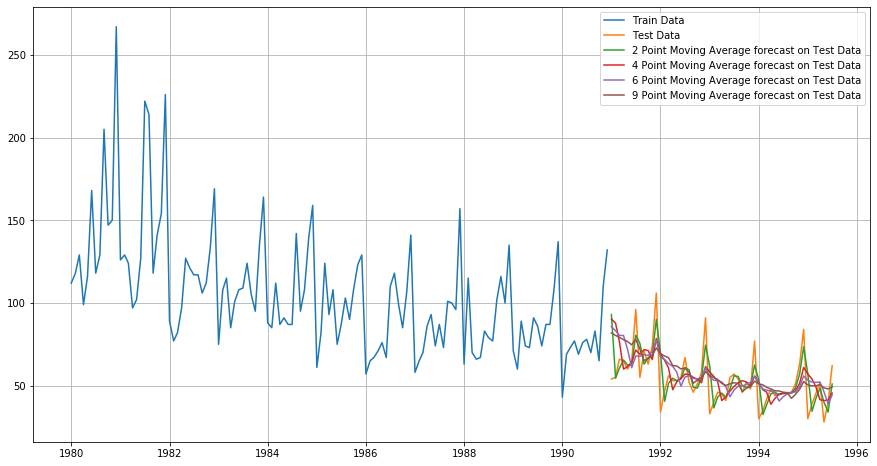

In [197]:
plt.figure(figsize=(15,8))
plt.plot(dfr_ma_train.Rose, label="Train Data")
plt.plot(dfr_ma_test.Rose, label="Test Data")
plt.plot(dfr_ma_test['2 point moving average'], label="2 Point Moving Average forecast on Test Data")
plt.plot(dfr_ma_test['4 point moving average'], label="4 Point Moving Average forecast on Test Data")
plt.plot(dfr_ma_test['6 point moving average'], label="6 Point Moving Average forecast on Test Data")
plt.plot(dfr_ma_test['9 point moving average'], label="9 Point Moving Average forecast on Test Data")
plt.legend(loc="best")
plt.grid();

In [198]:
dfr_2pma_rmse = mean_squared_error(dfr_ma_test["Rose"], dfr_ma_test["2 point moving average"], squared=False)
dfr_4pma_rmse = mean_squared_error(dfr_ma_test["Rose"], dfr_ma_test["4 point moving average"], squared=False)
dfr_6pma_rmse = mean_squared_error(dfr_ma_test["Rose"], dfr_ma_test["6 point moving average"], squared=False)
dfr_9pma_rmse = mean_squared_error(dfr_ma_test["Rose"], dfr_ma_test["9 point moving average"], squared=False)
print("RMSE for 2 point Moving Average forecast model on Rose wine data is %3.3f" %dfr_2pma_rmse)
print("RMSE for 4 point Moving Average forecast model on Rose wine data is %3.3f" %dfr_4pma_rmse)
print("RMSE for 6 point Moving Average forecast model on Rose wine data is %3.3f" %dfr_6pma_rmse)
print("RMSE for 9 point Moving Average forecast model on Rose wine data is %3.3f" %dfr_9pma_rmse)

RMSE for 2 point Moving Average forecast model on Rose wine data is 11.529
RMSE for 4 point Moving Average forecast model on Rose wine data is 14.451
RMSE for 6 point Moving Average forecast model on Rose wine data is 14.566
RMSE for 9 point Moving Average forecast model on Rose wine data is 14.728


In [199]:
dfr_results = pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_2pma_rmse]},index=["2 Point Moving Average"]),])
dfr_results = pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_4pma_rmse]},index=["4 Point Moving Average"]),])
dfr_results = pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_6pma_rmse]},index=["6 Point Moving Average"]),])
dfr_results = pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_9pma_rmse]},index=["9 Point Moving Average"]),])

In [200]:
dfr_results

Test RMSE
Naive Model             79.718773
Linear Regression       15.268955
Simple Average          53.460570
2 Point Moving Average  11.529278
4 Point Moving Average  14.451403
6 Point Moving Average  14.566327
9 Point Moving Average  14.727630

In [201]:
# Simple Exponential Smoothing

In [202]:
dfr_ses_train= dfr_train.copy()
dfr_ses_test= dfr_test.copy()

In [203]:
dfr_ses_model= SimpleExpSmoothing(dfr_ses_train.Rose)
dfr_ses_autofit = dfr_ses_model.fit(optimized=True)

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [204]:
dfr_ses_autofit.params

{'smoothing_level': 0.09874976263905368,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38751258560546,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [205]:
dfr_ses_test["Prediction"] = dfr_ses_autofit.forecast(steps=len(dfr_ses_test))
dfr_ses_test.head()

Rose  Prediction
YearMonth                   
1991-01-01  54.0   87.104995
1991-02-01  55.0   87.104995
1991-03-01  66.0   87.104995
1991-04-01  65.0   87.104995
1991-05-01  60.0   87.104995

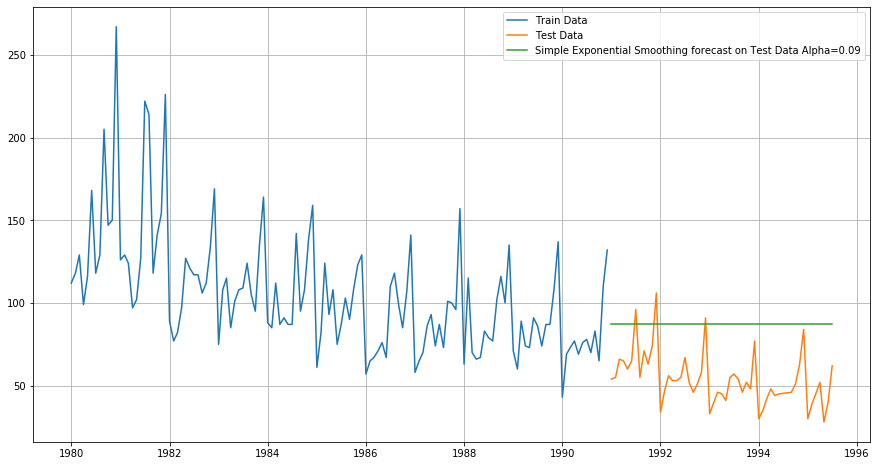

In [206]:
plt.figure(figsize=(15,8))
plt.plot(dfr_ses_train.Rose, label="Train Data")
plt.plot(dfr_ses_test.Rose, label="Test Data")
plt.plot(dfr_ses_test.Prediction, label="Simple Exponential Smoothing forecast on Test Data Alpha=0.09")
plt.legend(loc="best")
plt.grid();

In [207]:
dfr_ses_rmse = mean_squared_error(dfr_ses_test["Rose"],dfr_ses_test["Prediction"], squared=False)
print("RMSE for SES forecast model on Rose wine data is %3.3f" %dfr_ses_rmse)

RMSE for SES forecast model on Rose wine data is 36.796


In [208]:
dfr_results= pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_ses_rmse]}, index=["Alpha=0.09, SES"]),])

In [209]:
dfr_results

Test RMSE
Naive Model             79.718773
Linear Regression       15.268955
Simple Average          53.460570
2 Point Moving Average  11.529278
4 Point Moving Average  14.451403
6 Point Moving Average  14.566327
9 Point Moving Average  14.727630
Alpha=0.09, SES         36.796239

In [210]:
# Double Exponential Smoothing

In [211]:
dfr_des_train = dfr_train.copy()
dfr_des_test = dfr_test.copy()

In [212]:
dfr_des_model = Holt(dfr_des_train.Rose)
dfr_des_autofit = dfr_des_model.fit(optimized=True)

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [213]:
dfr_des_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [214]:
dfr_des_test["Prediction"] = dfr_des_autofit.forecast(steps=len(dfr_des_test))
dfr_des_test.head()

Rose  Prediction
YearMonth                   
1991-01-01  54.0   86.863579
1991-02-01  55.0   88.028056
1991-03-01  66.0   89.192534
1991-04-01  65.0   90.357011
1991-05-01  60.0   91.521488

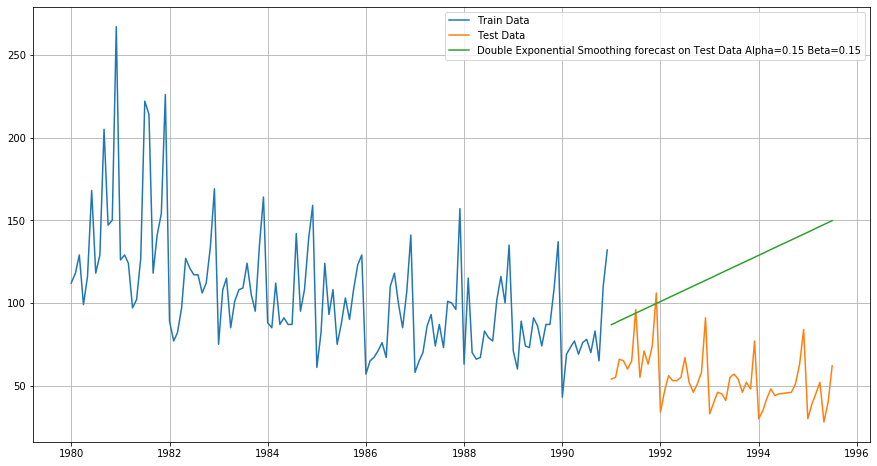

In [215]:
plt.figure(figsize=(15,8))
plt.plot(dfr_des_train.Rose, label="Train Data")
plt.plot(dfr_des_test.Rose, label="Test Data")
plt.plot(dfr_des_test.Prediction, label="Double Exponential Smoothing forecast on Test Data Alpha=0.15 Beta=0.15")
plt.legend(loc="best")
plt.grid();

In [216]:
dfr_des_rmse = mean_squared_error(dfr_des_test["Rose"],dfr_des_test["Prediction"], squared=False)
print("RMSE for DES forecast model on Rose wine data is %3.3f" %dfr_des_rmse)

RMSE for DES forecast model on Rose wine data is 70.572


In [217]:
dfr_results= pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_des_rmse]},index=["Alpha=0.15, Beta=0.15, DES"]),])

In [218]:
dfr_results

Test RMSE
Naive Model                 79.718773
Linear Regression           15.268955
Simple Average              53.460570
2 Point Moving Average      11.529278
4 Point Moving Average      14.451403
6 Point Moving Average      14.566327
9 Point Moving Average      14.727630
Alpha=0.09, SES             36.796239
Alpha=0.15, Beta=0.15, DES  70.572452

In [219]:
# Triple Exponential smoothing (Holt-Winters)

In [220]:
dfr_tes_train = dfr_train.copy()
dfr_tes_test = dfr_test.copy()

In [221]:
dfr_tes_model = ExponentialSmoothing(dfr_tes_train.Rose,trend='additive',seasonal='additive')
dfr_tes_autofit = dfr_tes_model.fit(optimized=True)

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [222]:
dfr_tes_autofit.params

{'smoothing_level': 0.13346419155496156,
 'smoothing_slope': 0.013799003011050462,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 77.88760840203805,
 'initial_slope': 0.0,
 'initial_seasons': array([ 37.22512664,  49.55914984,  57.49063909,  46.84824177,
         55.60691281,  61.03952791,  70.96491019,  76.99009393,
         73.00798464,  71.11386606,  89.18174761, 131.39710677]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [223]:
dfr_tes_test["Prediction"] = dfr_tes_autofit.forecast(steps=len(dfr_tes_test))
dfr_tes_test.head()

Rose  Prediction
YearMonth                   
1991-01-01  54.0   44.139564
1991-02-01  55.0   56.077991
1991-03-01  66.0   63.613884
1991-04-01  65.0   52.575891
1991-05-01  60.0   60.938966

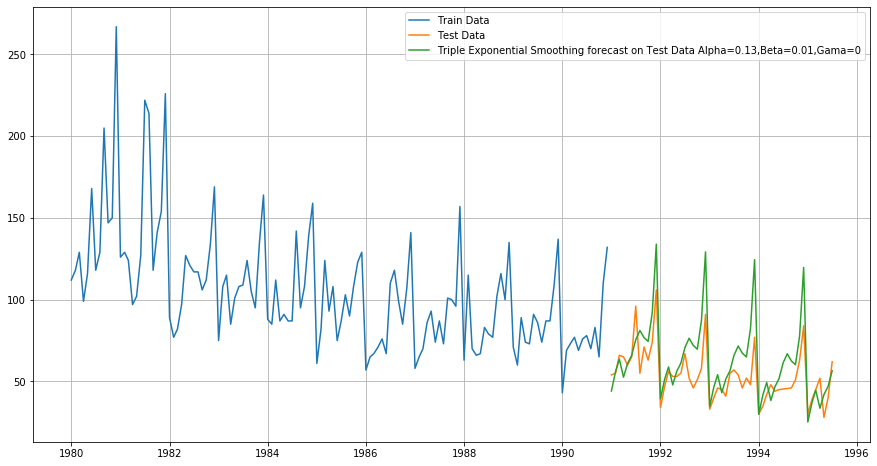

In [224]:
plt.figure(figsize=(15,8))
plt.plot(dfr_tes_train.Rose, label="Train Data")
plt.plot(dfr_tes_test.Rose, label="Test Data")
plt.plot(dfr_tes_test.Prediction, label="Triple Exponential Smoothing forecast on Test Data Alpha=0.13,Beta=0.01,Gama=0")
plt.legend(loc="best")
plt.grid();

In [225]:
dfr_tes_rmse = mean_squared_error(dfr_tes_test["Rose"],dfr_tes_test["Prediction"],squared=False)
print("RMSE for TES forecast model on Rose wine data is %3.3f" %dfr_tes_rmse)

RMSE for TES forecast model on Rose wine data is 16.443


In [226]:
dfr_results = pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_tes_rmse]},index=["Alpha=0.13, Beta=0.01, Gamma=0, TES"]),])

In [227]:
dfr_results

Test RMSE
Naive Model                          79.718773
Linear Regression                    15.268955
Simple Average                       53.460570
2 Point Moving Average               11.529278
4 Point Moving Average               14.451403
6 Point Moving Average               14.566327
9 Point Moving Average               14.727630
Alpha=0.09, SES                      36.796239
Alpha=0.15, Beta=0.15, DES           70.572452
Alpha=0.13, Beta=0.01, Gamma=0, TES  16.443252

In [228]:
# Stationary Check

In [229]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

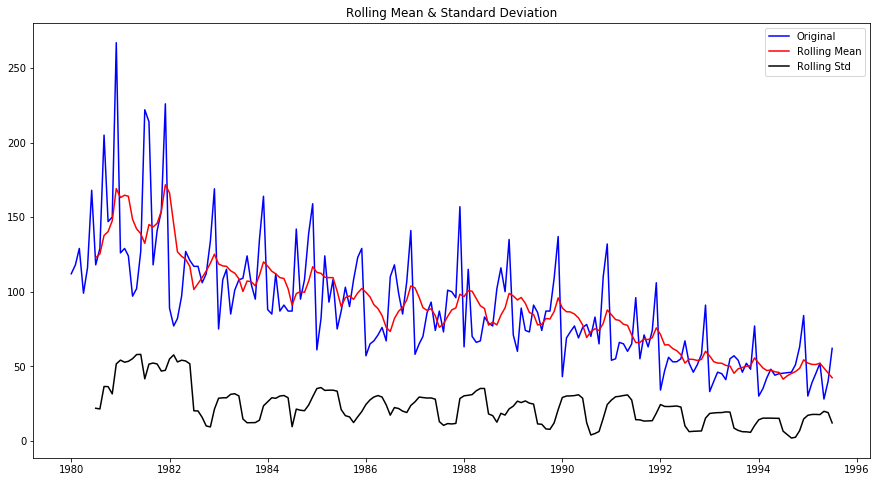

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [230]:
test_stationarity(dfr.Rose)

In [231]:
# Checking for stationarity on train data

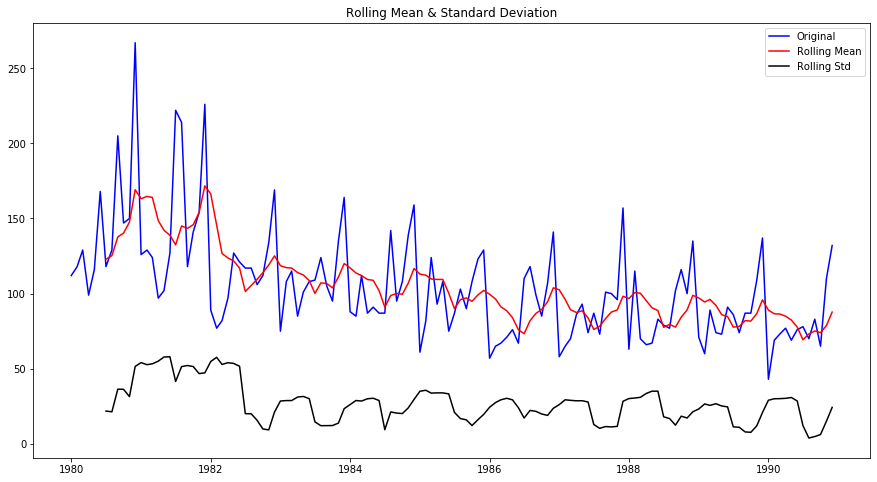

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [232]:
test_stationarity(dfr_train)

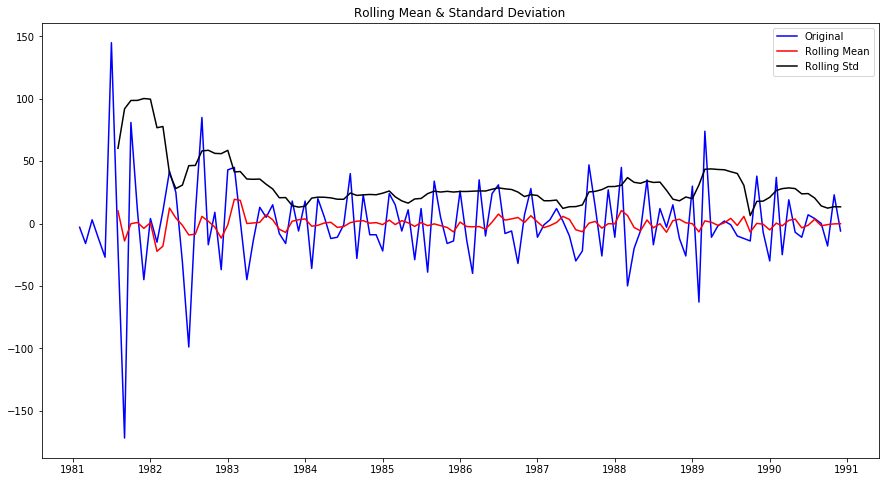

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [233]:
test_stationarity(dfr_train.diff(12).diff().dropna())

In [234]:
# Automated ARIMA SARIMA

In [235]:
# 1 Automated ARIMA

In [236]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [237]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [238]:
for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(dfr_train['Rose'].values,order=param,enforce_stationarity=False,enforce_invertibility=False).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1323.9657875279158
ARIMA(0, 1, 1) - AIC:1263.5369097383966
ARIMA(0, 1, 2) - AIC:1251.6675430541038
ARIMA(1, 1, 0) - AIC:1308.161871082466
ARIMA(1, 1, 1) - AIC:1262.1840064255507
ARIMA(1, 1, 2) - AIC:1251.9495040706183
ARIMA(2, 1, 0) - AIC:1280.2537561535767
ARIMA(2, 1, 1) - AIC:1263.2315231794119
ARIMA(2, 1, 2) - AIC:1253.9102116146723


In [239]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1251.667543
5  (1, 1, 2)  1251.949504
8  (2, 1, 2)  1253.910212
4  (1, 1, 1)  1262.184006
7  (2, 1, 1)  1263.231523
1  (0, 1, 1)  1263.536910
6  (2, 1, 0)  1280.253756
3  (1, 1, 0)  1308.161871
0  (0, 1, 0)  1323.965788

In [240]:
auto_ARIMA = sm.tsa.arima.ARIMA(dfr_train.Rose, order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 28 May 2023   AIC                           1279.672
Time:                        06:46:32   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


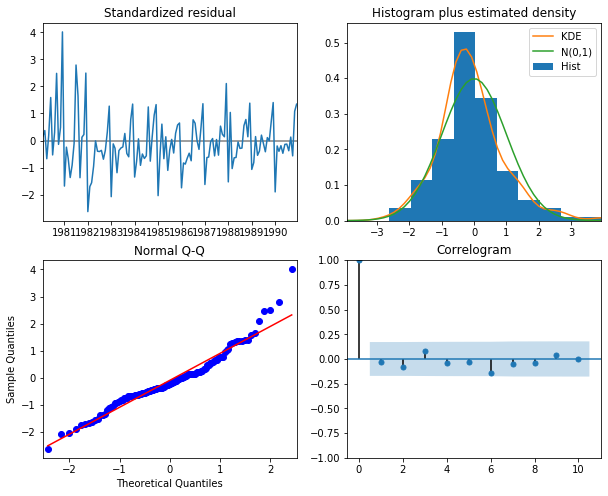

In [241]:
results_auto_ARIMA.plot_diagnostics(figsize=(10, 8));

In [242]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(dfr_test))

In [243]:
predicted_auto_ARIMA

1991-01-01    96.026636
1991-02-01    87.495114
1991-03-01    87.495114
1991-04-01    87.495114
1991-05-01    87.495114
1991-06-01    87.495114
1991-07-01    87.495114
1991-08-01    87.495114
1991-09-01    87.495114
1991-10-01    87.495114
1991-11-01    87.495114
1991-12-01    87.495114
1992-01-01    87.495114
1992-02-01    87.495114
1992-03-01    87.495114
1992-04-01    87.495114
1992-05-01    87.495114
1992-06-01    87.495114
1992-07-01    87.495114
1992-08-01    87.495114
1992-09-01    87.495114
1992-10-01    87.495114
1992-11-01    87.495114
1992-12-01    87.495114
1993-01-01    87.495114
1993-02-01    87.495114
1993-03-01    87.495114
1993-04-01    87.495114
1993-05-01    87.495114
1993-06-01    87.495114
1993-07-01    87.495114
1993-08-01    87.495114
1993-09-01    87.495114
1993-10-01    87.495114
1993-11-01    87.495114
1993-12-01    87.495114
1994-01-01    87.495114
1994-02-01    87.495114
1994-03-01    87.495114
1994-04-01    87.495114
1994-05-01    87.495114
1994-06-01    87

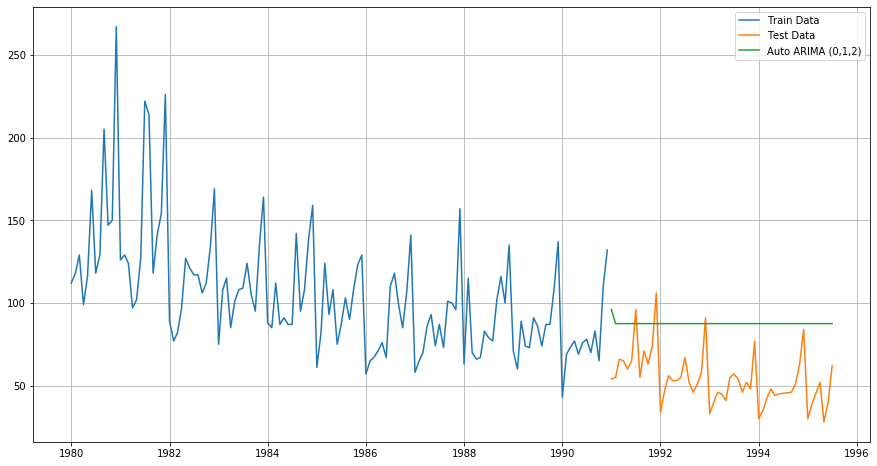

In [244]:
plt.figure(figsize=(15,8))
plt.plot(dfr_train.Rose, label="Train Data")
plt.plot(dfr_test.Rose, label="Test Data")
plt.plot(predicted_auto_ARIMA, label="Auto ARIMA (0,1,2)")
plt.legend(loc="best")
plt.grid();

In [245]:
dfr_auto_ARIMA_rmse=mean_squared_error(dfr_test["Rose"],predicted_auto_ARIMA,squared=False)
print("RMSE for Auto ARIMA forecast model on Rose wine data is %3.3f" %dfr_auto_ARIMA_rmse)

RMSE for Auto ARIMA forecast model on Rose wine data is 37.306


In [246]:
dfr_results = pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_auto_ARIMA_rmse]},index=["Auto ARIMA(0,1,2)"]),])

In [247]:
dfr_results

Test RMSE
Naive Model                          79.718773
Linear Regression                    15.268955
Simple Average                       53.460570
2 Point Moving Average               11.529278
4 Point Moving Average               14.451403
6 Point Moving Average               14.566327
9 Point Moving Average               14.727630
Alpha=0.09, SES                      36.796239
Alpha=0.15, Beta=0.15, DES           70.572452
Alpha=0.13, Beta=0.01, Gamma=0, TES  16.443252
Auto ARIMA(0,1,2)                    37.306480

In [248]:
auto_ARIMA = sm.tsa.arima.ARIMA(dfr_train.Rose, order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 28 May 2023   AIC                           1279.871
Time:                        06:46:34   BIC                           1291.372
Sample:                    01-01-1980   HQIC                          1284.544
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.263     -1.723      0.085      -0.970       0.062
ma.L1         -0.2542      0.242     -1.049      0.294      -0.729       0.221
ma.L2         -0.5983      0.201     -2.970      0.0

C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\91959\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


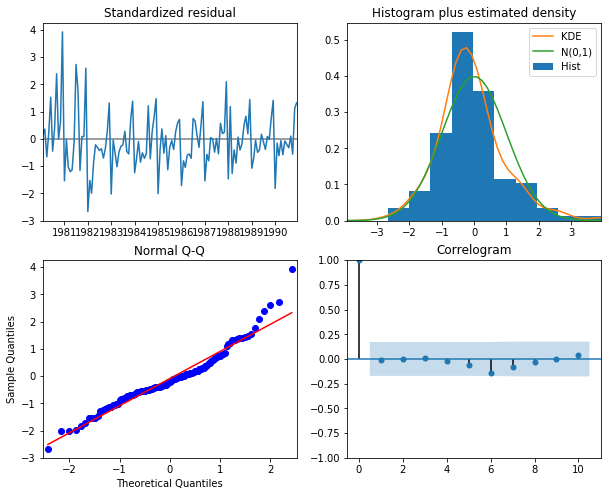

In [273]:
results_auto_ARIMA.plot_diagnostics(figsize=(10, 8));

In [250]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(dfr_test))

In [251]:
predicted_auto_ARIMA

1991-01-01    91.153348
1991-02-01    85.310656
1991-03-01    87.963045
1991-04-01    86.758948
1991-05-01    87.305568
1991-06-01    87.057421
1991-07-01    87.170072
1991-08-01    87.118932
1991-09-01    87.142148
1991-10-01    87.131608
1991-11-01    87.136393
1991-12-01    87.134221
1992-01-01    87.135207
1992-02-01    87.134759
1992-03-01    87.134962
1992-04-01    87.134870
1992-05-01    87.134912
1992-06-01    87.134893
1992-07-01    87.134902
1992-08-01    87.134898
1992-09-01    87.134900
1992-10-01    87.134899
1992-11-01    87.134899
1992-12-01    87.134899
1993-01-01    87.134899
1993-02-01    87.134899
1993-03-01    87.134899
1993-04-01    87.134899
1993-05-01    87.134899
1993-06-01    87.134899
1993-07-01    87.134899
1993-08-01    87.134899
1993-09-01    87.134899
1993-10-01    87.134899
1993-11-01    87.134899
1993-12-01    87.134899
1994-01-01    87.134899
1994-02-01    87.134899
1994-03-01    87.134899
1994-04-01    87.134899
1994-05-01    87.134899
1994-06-01    87

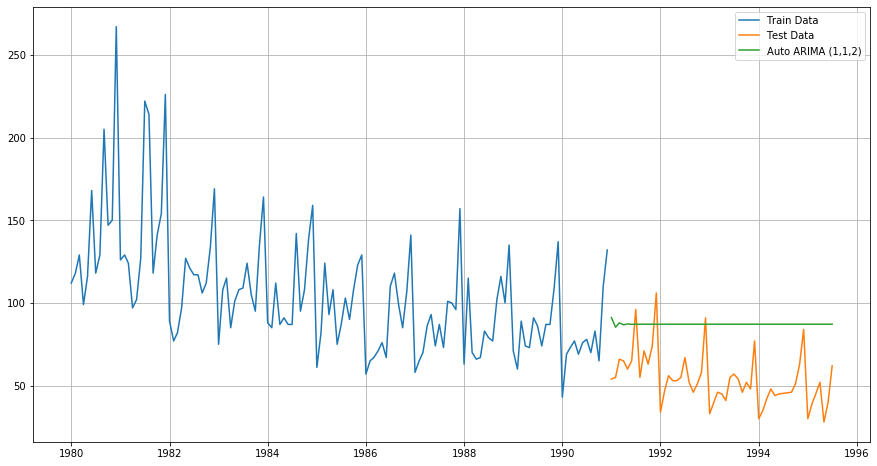

In [252]:
plt.figure(figsize=(15,8))
plt.plot(dfr_train.Rose, label="Train Data")
plt.plot(dfr_test.Rose, label="Test Data")
plt.plot(predicted_auto_ARIMA, label="Auto ARIMA (1,1,2)")
plt.legend(loc="best")
plt.grid();

In [253]:
dfr_auto_ARIMA_rmse=mean_squared_error(dfr_test["Rose"],predicted_auto_ARIMA,squared=False)
print("RMSE for Auto ARIMA forecast model on Rose wine data is %3.3f" %dfr_auto_ARIMA_rmse)

RMSE for Auto ARIMA forecast model on Rose wine data is 36.871


In [254]:
dfr_results = pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_auto_ARIMA_rmse]},index=["Auto ARIMA(1,1,2)"]),])

In [255]:
dfr_results

Test RMSE
Naive Model                          79.718773
Linear Regression                    15.268955
Simple Average                       53.460570
2 Point Moving Average               11.529278
4 Point Moving Average               14.451403
6 Point Moving Average               14.566327
9 Point Moving Average               14.727630
Alpha=0.09, SES                      36.796239
Alpha=0.15, Beta=0.15, DES           70.572452
Alpha=0.13, Beta=0.01, Gamma=0, TES  16.443252
Auto ARIMA(0,1,2)                    37.306480
Auto ARIMA(1,1,2)                    36.870660

In [256]:
# 2 Automated SARIMA

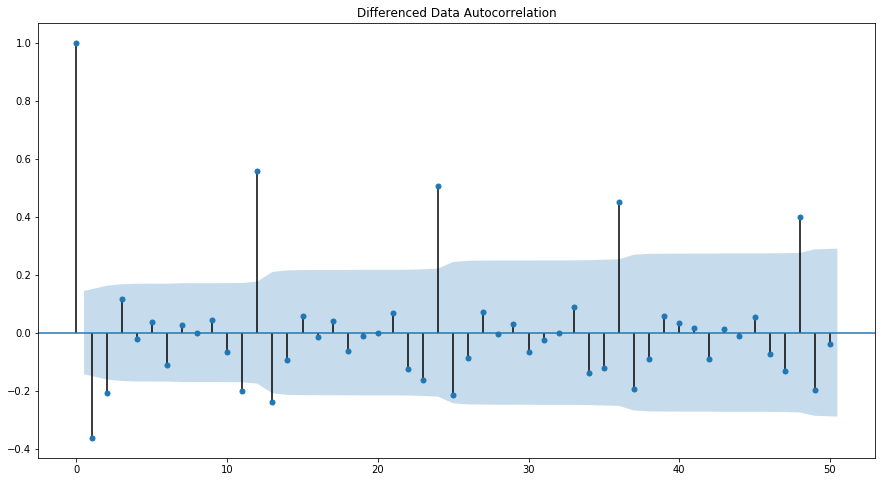

In [257]:
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [258]:
# We will take seasonality 12

In [259]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [260]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [261]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(dfr_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,  
                                            enforce_invertibility=False) 
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207264
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.43752963809
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938691
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635751406


C:\Users\91959\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697547
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894572
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383985
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918057
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945962
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483312231
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535959
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461676
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198825931508
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541038
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264958
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617705
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843414405
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933554877
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913552352
SARIMA(0, 1, 2)x(2, 0, 

In [262]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.903151
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [263]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(dfr_train['Rose'].values,
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 28 May 2023   AIC                            887.938
Time:                                    06:47:46   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.863     -0.004      0.996    -372.967     371.281
ma.L2         -0.1573     29.828   

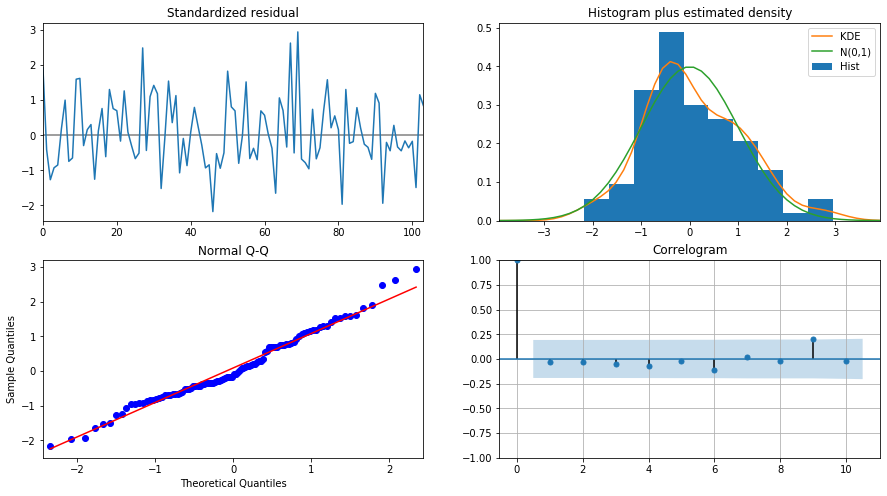

In [264]:
results_auto_SARIMA_12.plot_diagnostics()
plt.grid()

In [265]:
dfr_predicted_auto_SARIMA = results_auto_SARIMA_12.get_forecast(steps=len(dfr_test))

In [266]:
dfr_predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867263  15.928501      31.647976      94.086551
1  70.541190  16.147659      38.892360     102.190020
2  77.356411  16.147656      45.707586     109.005236
3  76.208814  16.147656      44.559989     107.857639
4  72.747398  16.147656      41.098573     104.396223

In [267]:
dfr_auto_SARIMA_rmse = mean_squared_error(dfr_test.Rose,dfr_predicted_auto_SARIMA.predicted_mean,squared=False)
print("RMSE for Auto SARIMA forecast model on Rose wine data is %3.3f" %dfr_auto_SARIMA_rmse)

RMSE for Auto SARIMA forecast model on Rose wine data is 26.928


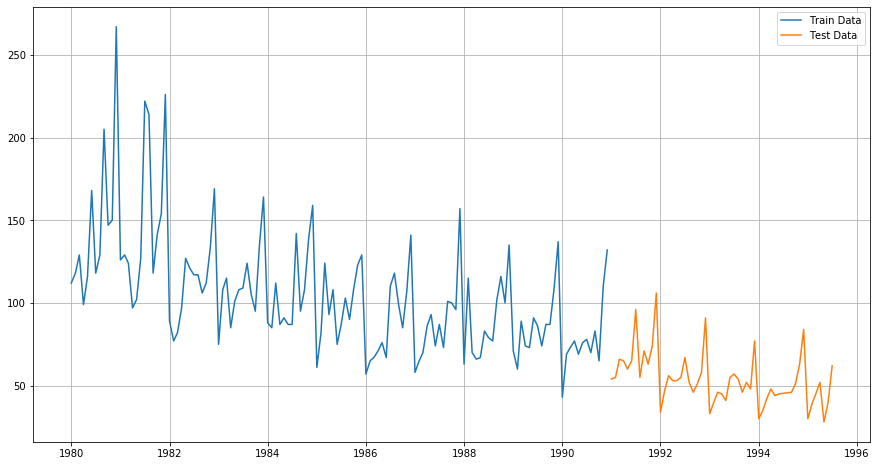

In [268]:
plt.figure(figsize=(15,8))
plt.plot(dfr_train.Rose, label="Train Data")
plt.plot(dfr_test.Rose, label="Test Data")
#plt.plot(dfr_predicted_auto_SARIMA, label="Auto SARIMA (0,1,2)(2,0,2,12)")
plt.legend(loc="best")
plt.grid();

In [269]:
dfr_results= pd.concat([dfr_results,pd.DataFrame({"Test RMSE": [dfr_auto_SARIMA_rmse]},index=["Auto SARIMAX(0,1,2)(2,0,2,12)"]),])

In [270]:
dfr_results

Test RMSE
Naive Model                          79.718773
Linear Regression                    15.268955
Simple Average                       53.460570
2 Point Moving Average               11.529278
4 Point Moving Average               14.451403
6 Point Moving Average               14.566327
9 Point Moving Average               14.727630
Alpha=0.09, SES                      36.796239
Alpha=0.15, Beta=0.15, DES           70.572452
Alpha=0.13, Beta=0.01, Gamma=0, TES  16.443252
Auto ARIMA(0,1,2)                    37.306480
Auto ARIMA(1,1,2)                    36.870660
Auto SARIMAX(0,1,2)(2,0,2,12)        26.928362

In [271]:
# RMSE table

In [272]:
dfr_results.sort_values(by="Test RMSE", ascending=True)

Test RMSE
2 Point Moving Average               11.529278
4 Point Moving Average               14.451403
6 Point Moving Average               14.566327
9 Point Moving Average               14.727630
Linear Regression                    15.268955
Alpha=0.13, Beta=0.01, Gamma=0, TES  16.443252
Auto SARIMAX(0,1,2)(2,0,2,12)        26.928362
Alpha=0.09, SES                      36.796239
Auto ARIMA(1,1,2)                    36.870660
Auto ARIMA(0,1,2)                    37.306480
Simple Average                       53.460570
Alpha=0.15, Beta=0.15, DES           70.572452
Naive Model                          79.718773